In [1]:
def siglas(nome_time):
    if nome_time == 'Bauru':
        return 'BAU'
    
    elif nome_time == 'Mogi':
        return 'MOG'
    
    elif nome_time == 'VipTech CMB':
        return 'CMO'
    
    elif nome_time == 'Brasília':
        return 'BSB'
    
    elif nome_time == 'Paulistano':
        return 'CAP'
    
    elif nome_time == 'Flamengo':
        return 'FLA'
    
    elif nome_time == 'Minas':
        return 'MIN'
    
    elif nome_time == 'UNIFACISA':
        return 'UFC'
    
    elif nome_time == 'Cerrado':
        return 'CER'
    
    elif nome_time == 'SESI Franca':
        return 'FRA'
    
    elif nome_time == 'Corinthians':
        return 'COR'
    
    elif nome_time == 'Pinheiros':
        return 'PIN'
    
    elif nome_time == 'Fortaleza B. C':
        return 'FOR'
    
    elif nome_time == 'KTO_ Caxias fo Sul':
        return 'CAX'
    
    elif nome_time == 'Pato':
        return 'PAT'
    
    elif nome_time == 'São Paulo':
        return 'SPF'

# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

Colunas:
* Quartos
* Tempo
* placar_cada
* placar_visitante
* Nome
*


Coluna Indicadores técnicos:

* fim_quarto -> Fim de quarto (qualquer quarto)
* inicio_quarto -> Inicio de quarto (qualquer quarto)
* fim_partida  -> Fim da Partida
* incio partida -> Inicio da Partida
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* 3_T_Pts    -> Três Pontos Tentados
* 2_C_Pts    -> Dois Pontos Convertidos
* 2_T_Pts    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FC_T         -> Faltas Técnica
* FC_A         -> Faltas Antidesportiva
* FC_O       -> Faltas Ofensiva
* FC_D        -> Faltas Desqualificante
* Entra       -> Entrada na Substituição 
* Sai           -> Saida na Substituição 
* tempo_tecnico -> Tempo Técnico
* ER         -> Erros
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

In [2]:
# !pip install dataframe_image

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import re
import dataframe_image as dfi

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from fpdf import FPDF
from funcoes_relatorio_analises import *

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv("tabela_1_VipTech CMB_x_Fortaleza B. C.1.csv")

In [8]:
# df = pd.read_csv("tabela_2_UNIFACISA_x_Rio Claro.csv")

In [9]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,61,74,NaN,fim_partida,NaN
1,1,4,00:00,61,74,NaN,fim_quarto,NaN
2,2,4,00:01,61,74,CMO,AS,Pezão
3,3,4,00:01,61,74,CMO,3_Pts_C,M Pajé
4,4,4,00:11,58,74,FOR,AS,Nogueira
...,...,...,...,...,...,...,...,...
540,540,1,10:00,0,0,CMO,substituicao_entra,M Pajé
541,541,1,10:00,0,0,CMO,substituicao_entra,Luizinho
542,542,1,10:00,0,0,CMO,substituicao_entra,Pierotti
543,543,1,10:00,0,0,CMO,substituicao_entra,Frierson


# Informações básicas sobre o jogo 

## Precisa colocar algumas informações básicas sobre o jogo para que completar a tabela 

In [10]:
data_hoje = datetime.today().strftime('%d/%m/%Y')
dia_do_jogo = '02/01/2021'
temporada = 2019

nome_time_casa = 'VipTech CMB'
nome_time_fora = 'Fortaleza B. C'

sigla_time_a = siglas(nome_time_casa)
sigla_time_b = siglas(nome_time_fora)
'''
nome_time_casa = 'UNIFACISA'
sigla_time_a = 'UFC'
sigla_time_b = 'RCB'
nome_time_fora = 'Rio Claro'
'''

casa = 'casa'
fora = 'fora'
classificatoria = '1 Turno'

In [11]:
arquivo = 'RELATORIO'
arquivo1 = f'informacoes_dos_times/{nome_time_casa}'
arquivo2 = f'informacoes_dos_times/{nome_time_fora}'
img_casa = f'{arquivo1}/{nome_time_casa}'
img_fora = f'{arquivo2}/{nome_time_fora}'

In [12]:
dia_do_jogo

'02/01/2021'

# Limpeza dos dados 

* primeiro evitar NAN (acredite!!! tem isso no site)

In [13]:
df.dropna(subset=['Tempo'], inplace=True)

* mudança do tempo
* colocar todos em segundos para facilitar a vida
* tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
* para isso localizei o valores errados e concertei

In [14]:
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [15]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [16]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [17]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [18]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [19]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 6)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 7)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [20]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

#  Acrescentamos mais colunas

In [21]:
df['diferenca_placar_casa'] = df['placar_casa'] - df['placar_visitante']
df['diferenca_placar_visitante'] = df['placar_visitante'] - df['placar_casa']
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,61,74,NaN,fim_partida,NaN,-13,13
1,4,2400,61,74,NaN,fim_quarto,NaN,-13,13
2,4,2399,61,74,CMO,AS,Pezão,-13,13
3,4,2399,61,74,CMO,3_Pts_C,M Pajé,-13,13
4,4,2389,58,74,FOR,AS,Nogueira,-16,16
...,...,...,...,...,...,...,...,...,...
540,1,0,0,0,CMO,substituicao_entra,M Pajé,0,0
541,1,0,0,0,CMO,substituicao_entra,Luizinho,0,0
542,1,0,0,0,CMO,substituicao_entra,Pierotti,0,0
543,1,0,0,0,CMO,substituicao_entra,Frierson,0,0


# Analise da pontuação dos times

In [22]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | 
               (df['Indicador'] == '2_Pts_C') |
               (df['Indicador'] == 'LL_Pts_C')|
               (df['Indicador'] == 'EN')|
               (df['Indicador'] == 'fim_partida')]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,61,74,NaN,fim_partida,NaN,-13,13
3,4,2399,61,74,CMO,3_Pts_C,M Pajé,-13,13
5,4,2389,58,74,FOR,3_Pts_C,Brite,-16,16
7,4,2368,58,71,CMO,2_Pts_C,Pezão,-13,13
8,4,2355,56,71,FOR,2_Pts_C,Holloway,-15,15
...,...,...,...,...,...,...,...,...,...
486,1,260,10,2,FOR,2_Pts_C,Felipe,8,-8
502,1,205,10,0,CMO,2_Pts_C,Lucão,10,-10
514,1,133,8,0,CMO,3_Pts_C,Frierson,8,-8
520,1,91,5,0,CMO,2_Pts_C,Lucão,5,-5


In [23]:
# estamos invertendo os valores para deixar parecido com o jogo
pontuacao = pontuacao[::-1]
pontuacao.reset_index(drop=True, inplace=True)
quartos = [600, 1200, 1800, 2400]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,57,3,0,CMO,3_Pts_C,Frierson,3,-3
1,1,91,5,0,CMO,2_Pts_C,Lucão,5,-5
2,1,133,8,0,CMO,3_Pts_C,Frierson,8,-8
3,1,205,10,0,CMO,2_Pts_C,Lucão,10,-10
4,1,260,10,2,FOR,2_Pts_C,Felipe,8,-8
...,...,...,...,...,...,...,...,...,...
68,4,2355,56,71,FOR,2_Pts_C,Holloway,-15,15
69,4,2368,58,71,CMO,2_Pts_C,Pezão,-13,13
70,4,2389,58,74,FOR,3_Pts_C,Brite,-16,16
71,4,2399,61,74,CMO,3_Pts_C,M Pajé,-13,13


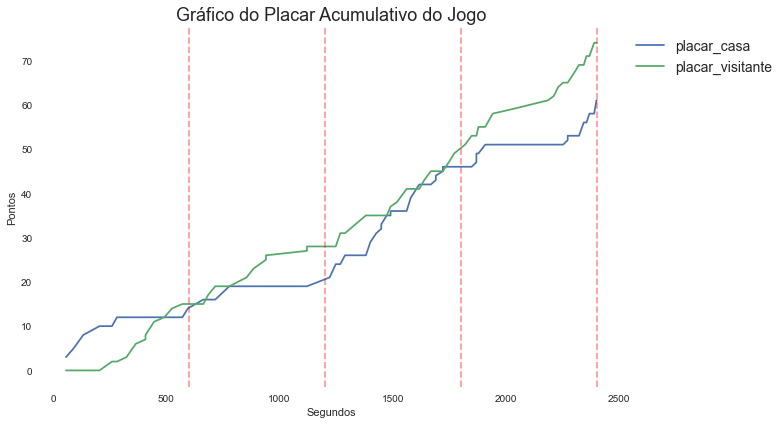

In [24]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(11,6))
tempo = pontuacao['Tempo']
pontuacao1 = pontuacao['placar_casa']
pontuacao2 = pontuacao['placar_visitante']
plt.plot(tempo, pontuacao1, label='placar_casa')
plt.plot(tempo, pontuacao2, label='placar_visitante')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.title('Gráfico do Placar Acumulativo do Jogo', fontsize=18)
plt.ylabel('Pontos')
plt.xlabel('Segundos')
plt.tight_layout()
plt.savefig('RELATORIO/teste.jpeg', format='jpg')

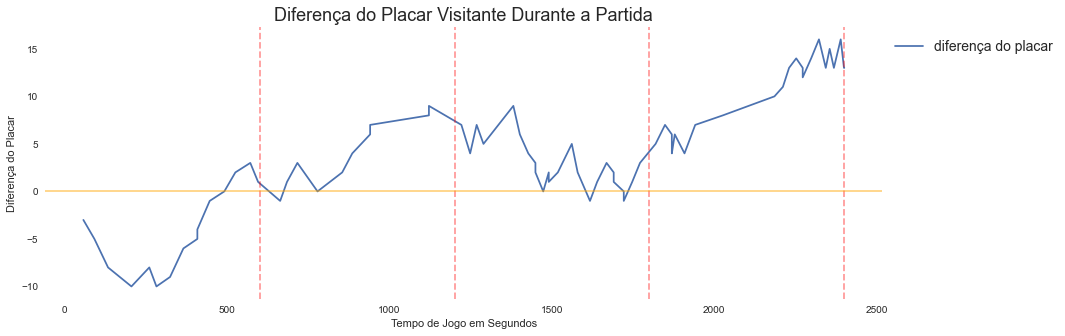

In [25]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'diferença do placar')
plt.title('Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

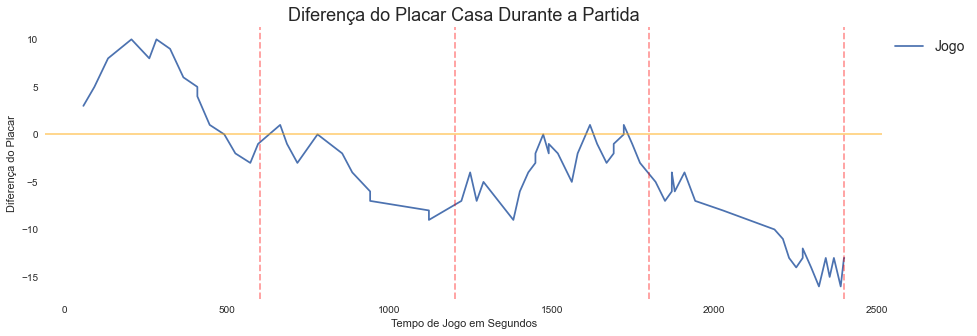

In [26]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_casa'], label = 'Jogo')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

# Analisar os períodos positivos dos times

In [27]:
# Criar um novo dataFrame para analisar os períodos positivos dos times
data = pd.DataFrame()
data['Time'] = pontuacao['Time']
data['Indicador'] = pontuacao['Indicador']
data['diff_pontuacao'] = pontuacao['diferenca_placar_visitante']
data['Tempo'] = pontuacao['Tempo']
data

,Time,Indicador,diff_pontuacao,Tempo
0,CMO,3_Pts_C,-3,57
1,CMO,2_Pts_C,-5,91
2,CMO,3_Pts_C,-8,133
3,CMO,2_Pts_C,-10,205
4,FOR,2_Pts_C,-8,260
...,...,...,...,...
68,FOR,2_Pts_C,15,2355
69,CMO,2_Pts_C,13,2368
70,FOR,3_Pts_C,16,2389
71,CMO,3_Pts_C,13,2399


In [28]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
data["pontuacao"] = data["diff_pontuacao"].diff()
data["pontuacao"] = data["pontuacao"].apply(lambda x: abs(x))

In [29]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = data["diff_pontuacao"][0]
data.loc[0, 'pontuacao'] = abs(novo_valor)

In [30]:
data.reset_index(drop=True, inplace=True)

In [31]:
data['pontuacao'] = data['pontuacao'].astype(int)
data.head(15)

,Time,Indicador,diff_pontuacao,Tempo,pontuacao
0,CMO,3_Pts_C,-3,57,3
1,CMO,2_Pts_C,-5,91,2
2,CMO,3_Pts_C,-8,133,3
3,CMO,2_Pts_C,-10,205,2
4,FOR,2_Pts_C,-8,260,2
5,CMO,2_Pts_C,-10,282,2
6,FOR,LL_Pts_C,-9,324,1
7,FOR,3_Pts_C,-6,365,3
8,FOR,LL_Pts_C,-5,408,1
9,FOR,LL_Pts_C,-4,408,1


In [32]:
data.to_csv('tempo2.csv')

In [33]:
# esse df é usado para retirar alguns argumentos que não fazem diferença 
# na função abaixo retiramos as listas vazias que o loop gera quando o time se repete 
def remove_item(my_list,*args):
    deletar = list(args)
    for item in deletar:
        while item in my_list:
            my_list.remove(item)
    return my_list

In [34]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# utilizado para determinar o tempo de início de cada período
tempo_a_inicio = []
tempo_b_inicio = []
# utilizado para agrupar os valores da pontuação dos times
time_a = []
time_b = []
# utilizados para somar os valores agrupados da pontuação 
soma_a = []
soma_b = []
# identificar o nome do time
nome_time_A = []
nome_time_B = []
for i in range(len(data)):
    # caso corresponda ao nome do time A
    if data['Time'][i] == sigla_time_a:
        # adiciona o valor da pontuação
        time_a.append(data['pontuacao'][i])
        ##########################################
        # pegam os valores acumulados do time B e as soma
        soma_b.append(sum(time_b))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_b = []
        # remove esses valores zerados
        soma_b = remove_item(soma_b, 0)
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # pega o primeiro valor do tempo de início
            tempo_a_inicio.append(data['Tempo'][i])
            # pega o primeiro valor do nome do time
            nome_time_A.append(data['Time'][i])
            flag = 1
        else:
            pass
    # caso corresponda ao nome do time B
    elif data['Time'][i] == sigla_time_b:
        # adiciona o valor da pontuação
        time_b.append(data['pontuacao'][i])
        #####################################################
        # pegam os valores acumulados do time A e as soma
        soma_a.append(sum(time_a))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_a = []
        # remove esses valores zerados
        soma_a = remove_item(soma_a, 0)
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # pega o primeiro valor do tempo de início
            tempo_b_inicio.append(data['Tempo'][i])
            # pega o primeiro valor do nome do time
            nome_time_B.append(data['Time'][i])
            flag = 0
        else:
            pass
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados 
        ultima_linha = data['Tempo'][i]
        # aplicamos as ultimas somas  para cada time
        soma_b.append(sum(time_b))
        soma_a.append(sum(time_a))
        # e removemos os valores que estão zerados 
        soma_a = remove_item(soma_a, 0)
        soma_b = remove_item(soma_b, 0)        

In [35]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_inicio) < len(tempo_b_inicio):
    tempo_a_inicio.append(ultima_linha)
    nome_time_A.append(nome_time_A[0])
    soma_a.append(np.nan)
# e acrescenta no a e agora tb acrescenta no B
elif len(tempo_a_inicio) > len(tempo_b_inicio):
    tempo_b_inicio.append(ultima_linha)
    nome_time_B.append(nome_time_B[0])
    soma_b.append(np.nan)

In [36]:
posse_de_bola_A = pd.DataFrame()
posse_de_bola_A['Time'] = nome_time_A
posse_de_bola_A['Tempo_de_Inicio'] = tempo_a_inicio
posse_de_bola_A['Tempo_de_Termino'] = tempo_b_inicio
posse_de_bola_A['Soma_Pontuacao'] = soma_a
posse_de_bola_A.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,CMO,57,260,10
1,CMO,282,324,2
2,CMO,595,684,4
3,CMO,778,854,3
4,CMO,1221,1268,5
5,CMO,1289,1335,2
6,CMO,1401,1490,9
7,CMO,1490,1518,1
8,CMO,1579,1639,6
9,CMO,1690,1747,4


In [37]:
# o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
del(tempo_a_inicio[0])
tempo_a_inicio.append(np.nan)

In [38]:
posse_de_bola_B = pd.DataFrame()
posse_de_bola_B['Time'] = nome_time_B
posse_de_bola_B['Tempo_de_Inicio'] = tempo_b_inicio
posse_de_bola_B['Tempo_de_Termino'] = tempo_a_inicio
posse_de_bola_B['Soma_Pontuacao'] = soma_b
posse_de_bola_B.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,FOR,260,282.0,2.0
1,FOR,324,595.0,13.0
2,FOR,684,778.0,4.0
3,FOR,854,1221.0,9.0
4,FOR,1268,1289.0,3.0
5,FOR,1335,1401.0,4.0
6,FOR,1490,1490.0,2.0
7,FOR,1518,1579.0,4.0
8,FOR,1639,1690.0,4.0
9,FOR,1747,1869.0,8.0


In [39]:
posse_de_bola_bruta = pd.concat([posse_de_bola_A, posse_de_bola_B], ignore_index=True)

In [40]:
posse_de_bola_bruta.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [41]:
posse_de_bola_bruta["diff_pontuacao"] = posse_de_bola_bruta["Soma_Pontuacao"].diff()
posse_de_bola_bruta.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao,diff_pontuacao
0,CMO,57,260.0,10.0,NaN
1,FOR,260,282.0,2.0,-8.0
2,CMO,282,324.0,2.0,0.0
3,FOR,324,595.0,13.0,11.0
4,CMO,595,684.0,4.0,-9.0
5,FOR,684,778.0,4.0,0.0
6,CMO,778,854.0,3.0,-1.0
7,FOR,854,1221.0,9.0,6.0
8,CMO,1221,1268.0,5.0,-4.0
9,FOR,1268,1289.0,3.0,-2.0


In [42]:
periodos_posteriores = []
for i in range(len(posse_de_bola_bruta)):
    if posse_de_bola_bruta['Soma_Pontuacao'][i] >= 5:
        periodo_potencial_a_positivo = 1
    else:
        if (posse_de_bola_bruta['diff_pontuacao'][i] <= -4) & (posse_de_bola_bruta['Soma_Pontuacao'][i] < 3):
            periodos_posteriores.append(posse_de_bola_bruta['Tempo_de_Inicio'][i])
            if periodo_potencial_a_positivo == 1:
                periodo_potencial_a_positivo = 0
            elif periodo_potencial_a_positivo != 1:
                periodo_potencial_a_positivo = 0

In [43]:
periodos_posteriores

[260, 1490, 2272]

In [44]:
periodos_iniciais = posse_de_bola_bruta[~posse_de_bola_bruta['Tempo_de_Inicio'].isin(periodos_posteriores)]
periodos_iniciais.reset_index(inplace=True, drop=True)
periodos_iniciais.head()

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao,diff_pontuacao
0,CMO,57,260.0,10.0,NaN
1,CMO,282,324.0,2.0,0.0
2,FOR,324,595.0,13.0,11.0
3,CMO,595,684.0,4.0,-9.0
4,FOR,684,778.0,4.0,0.0


In [45]:
flag = -1
tempo_a_peridodo_inicial = []
tempo_b_peridodo_inicial = []
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
pontuação_a = []
pontuação_b = []
nome_time_A = []
nome_time_B = []
# como o time do flamengo começa, o time de minas não apresenta o primeiro valor
# por causa disso é acrescentado um valor 0 que não existe 
potencial_final_periodo_a = 0
potencial_final_periodo_b = 0

for i in range(len(periodos_iniciais)):
    if periodos_iniciais['Time'][i] == sigla_time_a:
        if flag != 1:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_a_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_A.append(periodos_iniciais['Time'][i])
            pontuação_a.append(periodos_iniciais['Soma_Pontuacao'][i])
            ##################################################################
            tempo_b_peridodo_final.append(potencial_final_periodo_b)
            flag = 1
        else:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 1
    else:
        if flag != 0:
            tempo_a_peridodo_final.append(potencial_final_periodo_a)
            ############################################################
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_b_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_B.append(periodos_iniciais['Time'][i])
            pontuação_b.append(periodos_iniciais['Soma_Pontuacao'][i])
            flag = 0
        else:
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 0

In [46]:
periodos_A = pd.DataFrame()
periodos_A['Time'] = nome_time_A
periodos_A['Tempo_de_Inicio'] = tempo_a_peridodo_inicial
periodos_A['Tempo_de_Termino'] = tempo_a_peridodo_final
periodos_A['Soma_Pontuacao'] = pontuação_a

In [47]:
# o fim do tempo b é o início do tempo A, pq a troca de bola é alternada 
fim_b = tempo_b_peridodo_final
del(fim_b[0])
fim_b.append(np.nan)

In [48]:
periodos_B = pd.DataFrame()
periodos_B['Time'] = nome_time_B
periodos_B['Tempo_de_Inicio'] = tempo_b_peridodo_inicial
periodos_B['Tempo_de_Termino'] = tempo_b_peridodo_final
periodos_B['Soma_Pontuacao'] = pontuação_b

In [49]:
periodo = pd.concat([periodos_A, periodos_B], ignore_index=True)

In [50]:
periodo.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)
periodo

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,CMO,57,324.0,10.0
1,FOR,324,595.0,13.0
2,CMO,595,684.0,4.0
3,FOR,684,778.0,4.0
4,CMO,778,854.0,3.0
5,FOR,854,1221.0,9.0
6,CMO,1221,1268.0,5.0
7,FOR,1268,1289.0,3.0
8,CMO,1289,1335.0,2.0
9,FOR,1335,1401.0,4.0


In [51]:
periodo_final_a = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_a)]
periodo_final_a

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,CMO,57,324.0,10.0
6,CMO,1221,1268.0,5.0
10,CMO,1401,1490.0,9.0
12,CMO,1579,1639.0,6.0


In [52]:
periodo_final_a_inicio = list(periodo_final_a['Tempo_de_Inicio'])
periodo_final_a_final = list(periodo_final_a['Tempo_de_Termino'])

In [53]:
periodo_final_a_inicio

[57, 1221, 1401, 1579]

In [54]:
periodo_final_a_final

[324.0, 1268.0, 1490.0, 1639.0]

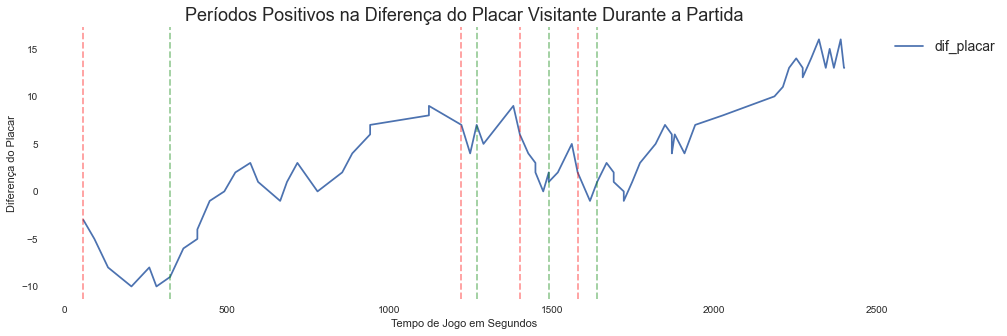

In [55]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_a_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_a_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste1.jpeg', format='jpg')

In [56]:
periodo_final_b = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_b)]

In [57]:
periodo_final_b_inicio = list(periodo_final_b['Tempo_de_Inicio'])
periodo_final_b_final = list(periodo_final_b['Tempo_de_Termino'])

In [58]:
periodo_final_b_inicio

[324, 854, 1747, 1941]

In [59]:
periodo_final_b_final

[595.0, 1221.0, 1869.0, 2343.0]

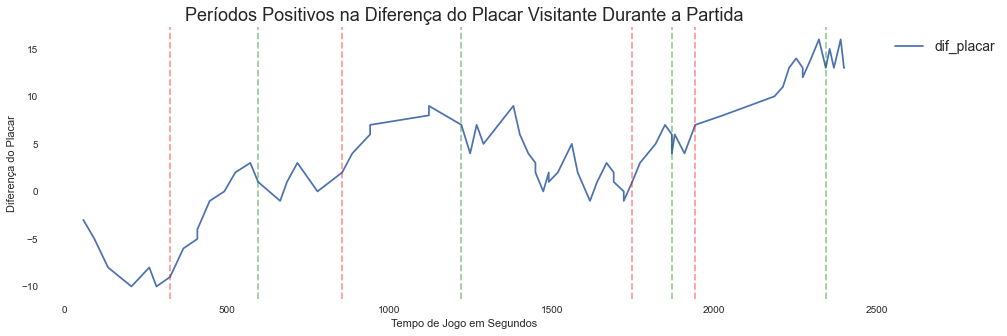

In [60]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_b_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_b_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste2.jpeg', format='jpg')

#### precisa fazer mais uma conta 

como as paradas são realizadas no primeiro momento em que se realiza ponto, nós perdemos as ações anteriores antes desse ponto acontecer
- A ideia é encontrar os pontos realizado (isso já foi realizado)
- depois precisa pegar esse ponto inicial e comparar em qual posse de bola se encontra esse inicio 
- ai sim podemos pegar o início da posse das ações que aconteceram anteriormente 

# Análise da Posse de Bola dos times

In [61]:
# usar esse flag para um DEF 
# ele retorna as váriaveis que eu quero e depois eu junto em um data frame

#### Quantas posses de bola há em um jogo?

In [62]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_T') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'FC_O')|                
                (df['Indicador'] == 'EN') | (df['Indicador'] == 'fim_partida')]

In [63]:
# estamos invertendo os valores para deixar parecido com o jogo
posse_bola = posse_bola[::-1]
posse_bola.reset_index(drop=True, inplace=True)
posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,17,0,0,FOR,2_Pts_T,Felipe,0,0
1,1,25,0,0,CMO,3_Pts_T,Frierson,0,0
2,1,53,0,0,CMO,3_Pts_T,Pierotti,0,0
3,1,57,3,0,CMO,3_Pts_C,Frierson,3,-3
4,1,71,3,0,FOR,2_Pts_T,Holloway,3,-3
...,...,...,...,...,...,...,...,...,...
183,4,2355,56,71,FOR,2_Pts_C,Holloway,-15,15
184,4,2368,58,71,CMO,2_Pts_C,Pezão,-13,13
185,4,2389,58,74,FOR,3_Pts_C,Brite,-16,16
186,4,2399,61,74,CMO,3_Pts_C,M Pajé,-13,13


In [64]:
posse_bola.to_csv('tempo2.csv')

In [65]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# valores finais da posse de bola
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
# identificar o nome do time
nome_time_A = []
nome_time_B = []
# identifica o tempo final
tempo_a_fim = 0
tempo_b_fim = 0

for i in range(len(posse_bola)):
    # caso corresponda ao nome do time A
    if posse_bola['Time'][i] == sigla_time_a:
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # o loop do Time B é terminado 
            tempo_b_peridodo_final.append(tempo_b_fim)
            # pega o primeiro valor do tempo de início
            tempo_a_fim = posse_bola['Tempo'][i]
            # pega o primeiro valor do nome do time
            nome_time_A.append(posse_bola['Time'][i])
            flag = 1
        else:
            tempo_a_fim = posse_bola['Tempo'][i]
            flag = 1
    # caso corresponda ao nome do time B
    elif posse_bola['Time'][i] == sigla_time_b:
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # o loop do Time A é terminado 
            tempo_a_peridodo_final.append(tempo_a_fim)
            # pega o primeiro valor do tempo final
            tempo_b_fim = posse_bola['Tempo'][i]
            # pega o primeiro valor do nome do time
            nome_time_B.append(posse_bola['Time'][i])
            flag = 0
        else:
            tempo_b_fim = posse_bola['Tempo'][i]
            flag = 0
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados
        ultima_linha = posse_bola['Tempo'][i]
        if flag != 1:
            nome_time_B.append(posse_bola['Time'][i])
            tempo_b_peridodo_final.append(tempo_b_fim)
        else:
            nome_time_A.append(posse_bola['Time'][i])
            tempo_a_peridodo_final.append(tempo_a_fim)

In [66]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_peridodo_final) < len(tempo_b_peridodo_final):
    tempo_a_peridodo_final.append(ultima_linha)
    nome_time_A.append(nome_time_A[0])
    # o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
    del(tempo_b_peridodo_final[0])
    tempo_b_peridodo_final.append(np.nan)
# e acrescenta no a e agora tb acrescenta no B
elif len(tempo_a_peridodo_final) > len(tempo_b_peridodo_final):
    tempo_b_peridodo_final.append(ultima_linha)
    nome_time_B.append(nome_time_B[0])
    # o fim do tempo a é o início do tempo B, pq a troca de bola é alternada
    del(tempo_a_peridodo_final[0])
    tempo_a_peridodo_final.append(np.nan)

In [67]:
posse_de_bola_a = pd.DataFrame()
posse_de_bola_a['Time'] = nome_time_A
posse_de_bola_a['Tempo_de_Inicio'] = tempo_b_peridodo_final
posse_de_bola_a['Tempo_de_Termino'] = tempo_a_peridodo_final

In [68]:
posse_de_bola_a

,Time,Tempo_de_Inicio,Tempo_de_Termino
0,CMO,17,57.0
1,CMO,71,91.0
2,CMO,112,133.0
3,CMO,156,174.0
4,CMO,187,205.0
...,...,...,...
60,CMO,2298,2318.0
61,CMO,2322,2343.0
62,CMO,2355,2368.0
63,CMO,2389,2399.0


In [69]:
posse_de_bola_b = pd.DataFrame()
posse_de_bola_b['Time'] = nome_time_B
posse_de_bola_b['Tempo_de_Inicio'] = tempo_a_peridodo_final
posse_de_bola_b['Tempo_de_Termino'] = tempo_b_peridodo_final

In [70]:
posse_de_bola_b

,Time,Tempo_de_Inicio,Tempo_de_Termino
0,FOR,57.0,17
1,FOR,91.0,71
2,FOR,133.0,112
3,FOR,174.0,156
4,FOR,205.0,187
...,...,...,...
60,FOR,2318.0,2298
61,FOR,2343.0,2322
62,FOR,2368.0,2355
63,FOR,2399.0,2389


In [71]:
posse_de_bola = pd.concat([posse_de_bola_a, posse_de_bola_b], ignore_index=True)

In [72]:
posse_de_bola.dropna(inplace=True)

In [73]:
posse_de_bola.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [74]:
posse_de_bola['Tempo_de_Termino'] = posse_de_bola['Tempo_de_Termino'].astype(int)

In [75]:
posse_de_bola['Tempo_Posse'] = posse_de_bola['Tempo_de_Termino'] - posse_de_bola['Tempo_de_Inicio']
posse_de_bola['Tempo_Posse'] = posse_de_bola['Tempo_Posse'].apply(lambda x: abs(x))

In [76]:
posse_de_bola.reset_index(inplace=True, drop=True)
posse_de_bola[49:]

,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
49,FOR,958.0,940,18.0
50,CMO,981.0,1014,33.0
51,FOR,1014.0,981,33.0
52,CMO,1020.0,1038,18.0
53,FOR,1038.0,1020,18.0
...,...,...,...,...
123,FOR,2343.0,2322,21.0
124,CMO,2355.0,2368,13.0
125,FOR,2368.0,2355,13.0
126,CMO,2389.0,2399,10.0


In [77]:
teste = posse_de_bola[posse_de_bola['Time']==sigla_time_a]
teste.reset_index(inplace=True,drop=True)
teste1 = posse_de_bola[posse_de_bola['Time']==sigla_time_b]
teste1.reset_index(inplace=True,drop=True)

In [78]:
grafico_posse_time1 = teste
grafico_posse_time1.reset_index(inplace=True)
grafico_posse_time2 = teste1
grafico_posse_time2.reset_index(inplace=True)

In [79]:
grafico_posse_time1

,index,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
0,0,CMO,17.0,57,40.0
1,1,CMO,71.0,91,20.0
2,2,CMO,112.0,133,21.0
3,3,CMO,156.0,174,18.0
4,4,CMO,187.0,205,18.0
...,...,...,...,...,...
59,59,CMO,2252.0,2276,24.0
60,60,CMO,2298.0,2318,20.0
61,61,CMO,2322.0,2343,21.0
62,62,CMO,2355.0,2368,13.0


In [80]:
grafico_posse_time2

,index,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
0,0,FOR,57.0,17,40.0
1,1,FOR,91.0,71,20.0
2,2,FOR,133.0,112,21.0
3,3,FOR,174.0,156,18.0
4,4,FOR,205.0,187,18.0
...,...,...,...,...,...
59,59,FOR,2276.0,2252,24.0
60,60,FOR,2318.0,2298,20.0
61,61,FOR,2343.0,2322,21.0
62,62,FOR,2368.0,2355,13.0


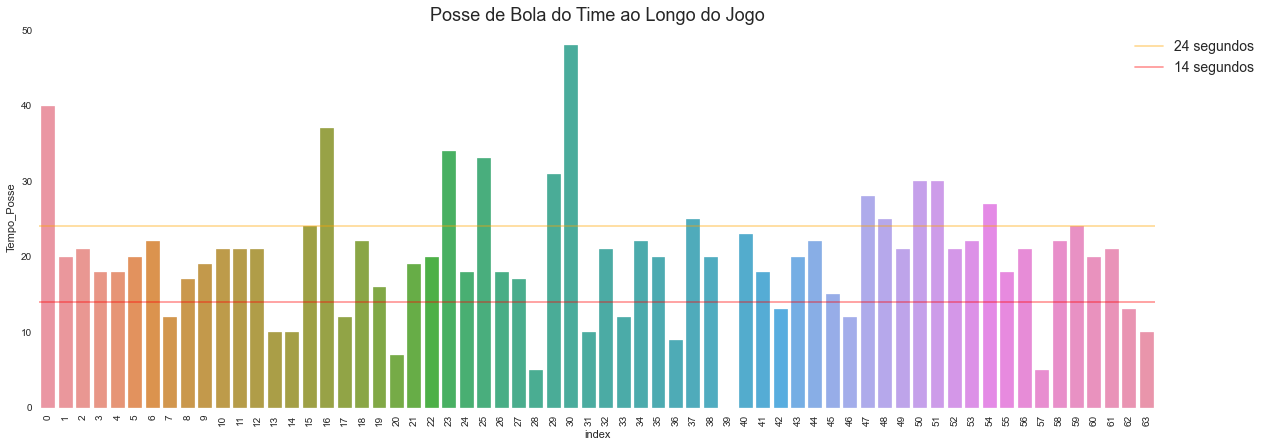

In [81]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Tempo_Posse', data=grafico_posse_time1)
plt.title('Posse de Bola do Time ao Longo do Jogo', fontsize=18)
plt.xticks(rotation=90)
plt.axhline(24, color='orange', alpha=0.4, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.4, label = '14 segundos')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste3.png', format='png')

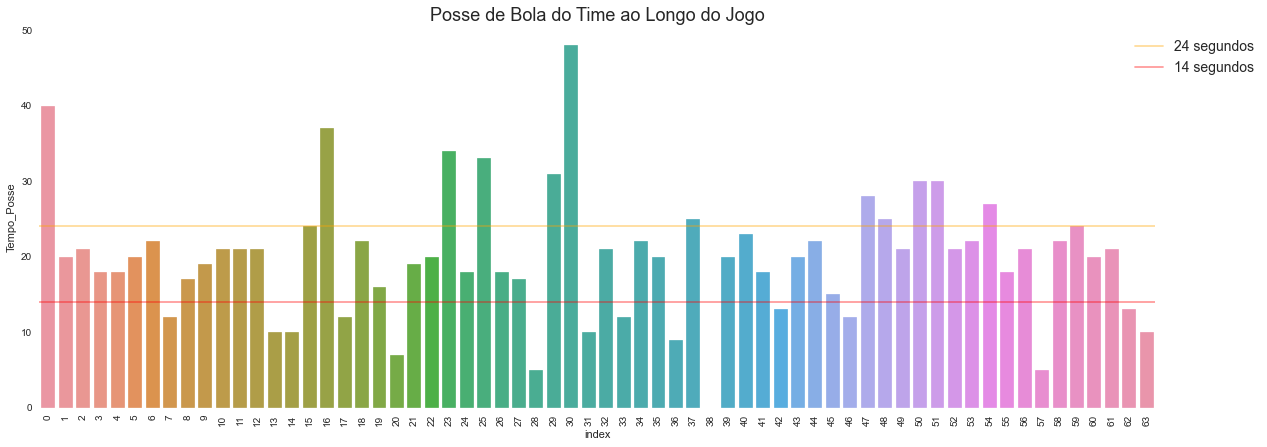

In [82]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Tempo_Posse', data=grafico_posse_time2)
plt.title('Posse de Bola do Time ao Longo do Jogo', fontsize=18)
plt.xticks(rotation=90)
plt.axhline(24, color='orange', alpha=0.4, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.4, label = '14 segundos')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste4.png', format='png')

# Tabela de dados geral

In [83]:
Tabela_Geral = df[['Time','Indicador','Nome']]

In [84]:
Tabela_Geral

,Time,Indicador,Nome
0,NaN,fim_partida,NaN
1,NaN,fim_quarto,NaN
2,CMO,AS,Pezão
3,CMO,3_Pts_C,M Pajé
4,FOR,AS,Nogueira
...,...,...,...
540,CMO,substituicao_entra,M Pajé
541,CMO,substituicao_entra,Luizinho
542,CMO,substituicao_entra,Pierotti
543,CMO,substituicao_entra,Frierson


In [85]:
Tabela_Geral_Time1 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_a]
Tabela_Geral_Time2 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_b]

In [86]:
Tabela_Geral_Time1

,Time,Indicador,Nome
2,CMO,AS,Pezão
3,CMO,3_Pts_C,M Pajé
6,CMO,AS,M Pajé
7,CMO,2_Pts_C,Pezão
9,CMO,AS,L Muller
...,...,...,...
539,CMO,substituicao_entra,Lucão
540,CMO,substituicao_entra,M Pajé
541,CMO,substituicao_entra,Luizinho
542,CMO,substituicao_entra,Pierotti


In [87]:
tabela_time1 = Tabela_Geral_Time1.groupby(['Nome', 'Indicador']).count()
tabela_time2 = Tabela_Geral_Time2.groupby(['Nome', 'Indicador']).count()

In [88]:
tabela_time1

Time
Nome         Indicador               
Campo Mourão RD                     3
             RO                     4
             tempo_tecnico          4
Castellon    3_Pts_C                1
             3_Pts_T                1
...                               ...
Pierotti     LL_Pts_C               7
             RD                     4
             RO                     1
             substituicao_entra     9
             substituicao_sai       9

[95 rows x 1 columns]

In [89]:
tabela_time2

Time
Nome      Indicador               
Alex      2_Pts_T                4
          3_Pts_T                1
          FC                     3
          FR                     1
          LL_Pts_C               1
...                            ...
Sualisson RD                     3
          RO                     3
          TO                     1
          substituicao_entra     2
          substituicao_sai       1

[111 rows x 1 columns]

In [90]:
tabela_time1_pivot = tabela_time1.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T
tabela_time2_pivot = tabela_time2.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T

In [91]:
tabela_time1_pivot

Indicador          2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  ER  FC  FC_O  \
     Nome                                                                     
Time Campo Mourão        0        0        0        0   0   0   0   0     0   
     Castellon           0        0        1        1   0   0   2   3     1   
     Frierson            0        1        3        6   1   0   1   1     0   
     L Muller            0        0        0        0   1   0   0   1     0   
     Lucão               5        0        0        0   1   0   2   3     1   
     Luizinho            0        2        0        0   0   0   3   2     1   
     M Pajé              1        1        1        4   4   0   2   1     0   
     Magna               2        3        3        6   1   0   3   3     0   
     Pezão               1        0        0        0   2   0   2   3     0   
     Pierotti            2        8        1        9   5   1   2   2     0   

Indicador          FR  LL_Pts_C  LL_Pts_T  RD  RO  TO  substituicao_entra  \
     Nome                                                                   
Time Campo Mourão   0         0         0   3   4   0                   0   
     Castellon      1         0         0   2   0   1                   4   
     Frierson       5         5         1   1   1   0                   7   
     L Muller       0         0         0   0   0   0                   9   
     Lucão          3         0         2   6   6   3                   5   
     Luizinho       2         0         0   3   1   0                   4   
     M Pajé         0         0         0   4   3   1                   4   
     Magna          0         0         0   1   0   0                   3   
     Pezão          0         0         0   1   3   0                   7   
     Pierotti       6         7         0   4   1   0                   9   

Indicador          substituicao_sai  tempo_tecnico  
     Nome                                           
Time Campo Mourão                 0              4  
     Castellon                    2              0  
     Frierson                     6              0  
     L Muller                     8              0  
     Lucão                        6              0  
     Luizinho                     5              0  
     M Pajé                       2              0  
     Magna                        4              0  
     Pezão                        5              0  
     Pierotti                     9              0

In [92]:
tabela_time2_pivot

Indicador                         2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  \
     Nome                                                                      
Time Alex                               0        4        0        1   0   0   
     Brite                              3        4        2        4   7   1   
     Cauê                               1        0        0        3   0   1   
     Felipe                             1        4        0        1   0   1   
     Fortaleza Basquete Cearense        0        0        0        0   0   0   
     Gabriel                            0        1        0        0   0   0   
     Holloway                           3        2        3        4   0   0   
     Mathias                            1        0        0        0   1   2   
     Nogueira                           3        0        0        0   5   0   
     Rashaun                            4        3        1        2   5   1   
     Sualisson                          4        2        0        0   0   0   

Indicador                         EN  ER  FC  FC_A  FC_T  FR  LL_Pts_C  \
     Nome                                                                
Time Alex                          0   0   3     0     0   1         1   
     Brite                         0   0   1     0     0   2         2   
     Cauê                          0   1   3     0     0   1         0   
     Felipe                        0   0   2     0     0   1         0   
     Fortaleza Basquete Cearense   0   0   0     0     0   0         0   
     Gabriel                       0   0   0     0     0   0         0   
     Holloway                      0   2   2     1     0   5         6   
     Mathias                       0   0   2     0     0   2         1   
     Nogueira                      1   2   2     0     1   3         1   
     Rashaun                       0   1   0     0     0   3         0   
     Sualisson                     1   0   1     0     0   4         1   

Indicador                         LL_Pts_T  RD  RO  TO  substituicao_entra  \
     Nome                                                                    
Time Alex                                1   0   2   0                   1   
     Brite                               2   2   1   1                   2   
     Cauê                                0   3   0   0                   3   
     Felipe                              0   3   0   0                   2   
     Fortaleza Basquete Cearense         0   2   3   0                   0   
     Gabriel                             0   0   0   0                   1   
     Holloway                            2   3   1   0                   3   
     Mathias                             1   1   1   0                   2   
     Nogueira                            1   3   2   2                   3   
     Rashaun                             1   3   1   0                   3   
     Sualisson                           1   3   3   1                   2   

Indicador                         substituicao_sai  tempo_tecnico  
     Nome                                                          
Time Alex                                        2              0  
     Brite                                       1              0  
     Cauê                                        3              0  
     Felipe                                      2              0  
     Fortaleza Basquete Cearense                 0              1  
     Gabriel                                     0              0  
     Holloway                                    2              0  
     Mathias                                     2              0  
     Nogueira                                    2              0  
     Rashaun                                     2              0  
     Sualisson                                   1              0

# Precisa verificar se está certo os arremessos 
# eu acho que precisa somar o tentados(errados) com os Convertido

In [93]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time1 = []
for i in tabela_time1_pivot:
    valores_coluna_time1.append(i)

tamanho_df_pivot = len(tabela_time1_pivot)
if 'TO' not in valores_coluna_time1:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time1:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time1:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time1:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_A'] = fca
if 'EN' not in valores_coluna_time1:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['EN'] = en

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Time'] = nome_time_casa0

nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Oponente'] = nome_time_fora0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Data'] = dia_do_jogo0

casa0 = [casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Casa/Fora'] = casa0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Classificatoria/Playoffs'] = classificatoria0

In [94]:
tabela_time1_pivot.reset_index(inplace=True)
tabela_time1_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time1_pivot

Indicador,Nome,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,AS,BR,ER,FC,FC_O,...,substituicao_sai,tempo_tecnico,FC_T,FC_A,EN,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs
0,Campo Mourão,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
1,Castellon,0,0,1,1,0,0,2,3,1,...,2,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
2,Frierson,0,1,3,6,1,0,1,1,0,...,6,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
3,L Muller,0,0,0,0,1,0,0,1,0,...,8,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
4,Lucão,5,0,0,0,1,0,2,3,1,...,6,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
5,Luizinho,0,2,0,0,0,0,3,2,1,...,5,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
6,M Pajé,1,1,1,4,4,0,2,1,0,...,2,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
7,Magna,2,3,3,6,1,0,3,3,0,...,4,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
8,Pezão,1,0,0,0,2,0,2,3,0,...,5,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno
9,Pierotti,2,8,1,9,5,1,2,2,0,...,9,0,0,0,0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno


In [95]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time2 = []
for i in tabela_time2_pivot:
    valores_coluna_time2.append(i)

tamanho_df_pivot = len(tabela_time2_pivot)
if 'TO' not in valores_coluna_time2:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time2:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time2:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time2:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_A'] = fca
if 'EN'not in valores_coluna_time2:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['EN'] = en
    
nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Time'] = nome_time_fora0

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Oponente'] = nome_time_casa0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Data'] = dia_do_jogo0

fora0 = [fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Casa/Fora'] = fora0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Classificatoria/Playoffs'] = classificatoria0  

In [96]:
tabela_time2_pivot.reset_index(inplace=True)
tabela_time2_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time2_pivot.head(5)

Indicador,Nome,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,AS,BR,EN,ER,FC,...,TO,substituicao_entra,substituicao_sai,tempo_tecnico,FC_O,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs
0,Alex,0,4,0,1,0,0,0,0,3,...,0,1,2,0,0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno
1,Brite,3,4,2,4,7,1,0,0,1,...,1,2,1,0,0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno
2,Cauê,1,0,0,3,0,1,0,1,3,...,0,3,3,0,0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno
3,Felipe,1,4,0,1,0,1,0,0,2,...,0,2,2,0,0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno
4,Fortaleza Basquete Cearense,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno


### criar um novo data frame e agregar a soma

In [97]:
Time1_Final = pd.DataFrame()

In [98]:
Time1_Final['Time'] = tabela_time1_pivot['Time']
Time1_Final['Oponente'] = tabela_time1_pivot['Oponente']
Time1_Final['Data'] = tabela_time1_pivot['Data']
Time1_Final['Casa/Fora'] = tabela_time1_pivot['Casa/Fora']
Time1_Final['Classificatoria/Playoffs'] = tabela_time1_pivot['Classificatoria/Playoffs']
Time1_Final['Nome'] = tabela_time1_pivot['Nome']
Time1_Final['Pts_3_C'] = tabela_time1_pivot['3_Pts_C'] * 3
Time1_Final['Pts_3_T'] = (tabela_time1_pivot['3_Pts_T'] + tabela_time1_pivot['3_Pts_C']) * 3
Time1_Final['Pts_2_C'] = (tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['Pts_2_T'] = (tabela_time1_pivot['2_Pts_T'] + tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['LL_C'] = tabela_time1_pivot['LL_Pts_C']
Time1_Final['LL_T'] = tabela_time1_pivot['LL_Pts_T'] + tabela_time1_pivot['LL_Pts_C']
Time1_Final['RO'] = tabela_time1_pivot['RO']
Time1_Final['RD'] = tabela_time1_pivot['RD']
Time1_Final['RT'] = tabela_time1_pivot['RO'] + tabela_time1_pivot['RD']
Time1_Final['AS'] = tabela_time1_pivot['AS']
Time1_Final['BR'] = tabela_time1_pivot['BR']
Time1_Final['TO'] = tabela_time1_pivot['TO']
Time1_Final['FC'] = tabela_time1_pivot['FC'] + tabela_time1_pivot['FC_T']+tabela_time1_pivot['FC_O']+tabela_time1_pivot['FC_A']
Time1_Final['FR'] = tabela_time1_pivot['FR']
Time1_Final['ER'] = tabela_time1_pivot['ER']
Time1_Final['EN'] = tabela_time1_pivot['EN']
Time1_Final['substituicao_entra'] = tabela_time1_pivot['substituicao_entra']
Time1_Final['substituicao_sai'] = tabela_time1_pivot['substituicao_sai']

In [99]:
Time1_Final['Ar_Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] -  Time1_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time1_Final['Ar_Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] # NÃO contabiliza EN
Time1_Final['Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] + Time1_Final['LL_C']
Time1_Final['Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] + Time1_Final['LL_T']
# mudar os nomes para ações coletivas
Time1_Final['Nome'].replace(nome_time_casa, 'Açõe coletivas', inplace=True)

In [100]:
Time1_Final['posse_de_bola'] = round(Time1_Final['Ar_Pts_T'] - Time1_Final['RO'] + Time1_Final['ER'] + (0.4 * Time1_Final['LL_T']), 0)
Time1_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Campo Mourão,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-4.0
1,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Castellon,3,6,0,0,...,1,2,0,4,2,3,6,3,6,8.0
2,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Frierson,9,27,0,2,...,5,1,0,7,6,9,29,14,35,31.0
3,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,L Muller,0,0,0,0,...,0,0,0,9,8,0,0,0,0,0.0
4,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Lucão,0,0,10,10,...,3,2,0,5,6,10,10,10,12,7.0
5,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Luizinho,0,0,0,4,...,2,3,0,4,5,0,4,0,4,6.0
6,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,M Pajé,3,15,2,4,...,0,2,0,4,2,5,19,5,19,18.0
7,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Magna,9,27,4,10,...,0,3,0,3,4,13,37,13,37,40.0
8,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pezão,0,0,2,2,...,0,2,0,7,5,2,2,2,2,1.0
9,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pierotti,3,30,4,20,...,6,2,0,9,9,7,50,14,57,54.0


In [101]:
Time2_Final = pd.DataFrame()

In [102]:
Time2_Final['Time'] = tabela_time2_pivot['Time']
Time2_Final['Oponente'] = tabela_time2_pivot['Oponente']
Time2_Final['Data'] = tabela_time2_pivot['Data']
Time2_Final['Casa/Fora'] = tabela_time2_pivot['Casa/Fora']
Time2_Final['Classificatoria/Playoffs'] = tabela_time2_pivot['Classificatoria/Playoffs']
Time2_Final['Nome'] = tabela_time2_pivot['Nome']
Time2_Final['Pts_3_C'] = tabela_time2_pivot['3_Pts_C'] * 3
Time2_Final['Pts_3_T'] = (tabela_time2_pivot['3_Pts_T'] + tabela_time2_pivot['3_Pts_C']) * 3
Time2_Final['Pts_2_C'] = (tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['Pts_2_T'] = (tabela_time2_pivot['2_Pts_T'] + tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['LL_C'] = tabela_time2_pivot['LL_Pts_C']
Time2_Final['LL_T'] = tabela_time2_pivot['LL_Pts_T'] + tabela_time2_pivot['LL_Pts_C']
Time2_Final['RO'] = tabela_time2_pivot['RO']
Time2_Final['RD'] = tabela_time2_pivot['RD']
Time2_Final['RT'] = tabela_time2_pivot['RO'] + tabela_time2_pivot['RD']
Time2_Final['AS'] = tabela_time2_pivot['AS']
Time2_Final['BR'] = tabela_time2_pivot['BR']
Time2_Final['TO'] = tabela_time2_pivot['TO']
Time2_Final['FC'] = tabela_time2_pivot['FC'] + tabela_time2_pivot['FC_T']+tabela_time2_pivot['FC_O']+tabela_time2_pivot['FC_A']
Time2_Final['FR'] = tabela_time2_pivot['FR']
Time2_Final['ER'] = tabela_time2_pivot['ER']
Time2_Final['EN'] = tabela_time2_pivot['EN']
Time2_Final['substituicao_entra'] = tabela_time2_pivot['substituicao_entra']
Time2_Final['substituicao_sai'] = tabela_time2_pivot['substituicao_sai']

In [103]:
Time2_Final['Ar_Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] -  Time2_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time2_Final['Ar_Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T']  # NÃO contabiliza EN
Time2_Final['Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] + Time2_Final['LL_C']
Time2_Final['Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T'] + Time2_Final['LL_T']
# mudar os nomes para ações coletivas
Time2_Final['Nome'].replace(nome_time_fora, 'Açõe coletivas', inplace=True)

In [104]:
Time2_Final['posse_de_bola'] = round(Time2_Final['Ar_Pts_T'] - Time2_Final['RO'] + Time2_Final['ER'] + (0.4 * Time2_Final['LL_T']), 0)
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Alex,0,3,0,8,...,1,0,0,1,2,0,11,1,13,10.0
1,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Brite,6,18,6,14,...,2,0,0,2,1,12,32,14,36,33.0
2,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Cauê,0,9,2,2,...,1,1,0,3,3,2,11,2,11,12.0
3,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Felipe,0,3,2,10,...,1,0,0,2,2,2,13,2,13,13.0
4,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Fortaleza Basquete Cearense,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-3.0
5,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Gabriel,0,0,0,2,...,0,0,0,1,0,0,2,0,2,2.0
6,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Holloway,9,21,6,10,...,5,2,0,3,2,15,31,21,39,35.0
7,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Mathias,0,0,2,2,...,2,0,0,2,2,2,2,3,4,2.0
8,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Nogueira,0,0,8,8,...,3,2,1,3,2,7,8,9,10,9.0
9,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Rashaun,3,9,8,14,...,3,1,0,3,2,11,23,11,24,23.0


### Somar tudo para ter o resultado da equipe

In [105]:
resultado_Time1 = Time1_Final.sum()
resultado_Time2 = Time2_Final.sum()

In [106]:
resultado_Time1['Nome'] = 'Equipe'
resultado_Time2['Nome'] = 'Equipe'
resultado_Time1['Time'] = nome_time_casa
resultado_Time2['Time'] = nome_time_fora
resultado_Time1['Oponente'] = nome_time_fora
resultado_Time2['Oponente'] = nome_time_casa
resultado_Time1['Data'] = dia_do_jogo
resultado_Time2['Data'] = dia_do_jogo
resultado_Time1['Casa/Fora'] = casa
resultado_Time2['Casa/Fora'] = fora
resultado_Time1['Classificatoria/Playoffs'] = classificatoria
resultado_Time2['Classificatoria/Playoffs'] = classificatoria

In [107]:
# agregar no dataframe final
Time1_Final = Time1_Final.append(resultado_Time1, ignore_index=True)
Time2_Final = Time2_Final.append(resultado_Time2, ignore_index=True)

In [108]:
Time1_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Campo Mourão,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-4.0
1,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Castellon,3,6,0,0,...,1,2,0,4,2,3,6,3,6,8.0
2,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Frierson,9,27,0,2,...,5,1,0,7,6,9,29,14,35,31.0
3,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,L Muller,0,0,0,0,...,0,0,0,9,8,0,0,0,0,0.0
4,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Lucão,0,0,10,10,...,3,2,0,5,6,10,10,10,12,7.0
5,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Luizinho,0,0,0,4,...,2,3,0,4,5,0,4,0,4,6.0
6,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,M Pajé,3,15,2,4,...,0,2,0,4,2,5,19,5,19,18.0
7,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Magna,9,27,4,10,...,0,3,0,3,4,13,37,13,37,40.0
8,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pezão,0,0,2,2,...,0,2,0,7,5,2,2,2,2,1.0
9,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pierotti,3,30,4,20,...,6,2,0,9,9,7,50,14,57,54.0


In [109]:
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Alex,0,3,0,8,...,1,0,0,1,2,0,11,1,13,10.0
1,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Brite,6,18,6,14,...,2,0,0,2,1,12,32,14,36,33.0
2,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Cauê,0,9,2,2,...,1,1,0,3,3,2,11,2,11,12.0
3,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Felipe,0,3,2,10,...,1,0,0,2,2,2,13,2,13,13.0
4,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Fortaleza Basquete Cearense,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-3.0
5,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Gabriel,0,0,0,2,...,0,0,0,1,0,0,2,0,2,2.0
6,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Holloway,9,21,6,10,...,5,2,0,3,2,15,31,21,39,35.0
7,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Mathias,0,0,2,2,...,2,0,0,2,2,2,2,3,4,2.0
8,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Nogueira,0,0,8,8,...,3,2,1,3,2,7,8,9,10,9.0
9,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Rashaun,3,9,8,14,...,3,1,0,3,2,11,23,11,24,23.0


In [110]:
# esse código é para a criação dos gráficos de comparação
tabela_times = pd.concat([Time1_Final[Time1_Final['Nome'] == 'Equipe'], Time2_Final[Time2_Final['Nome'] == 'Equipe']], ignore_index=True)
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Equipe,27,105,22,52,...,17,17,0,52,47,49,157,61,172,161.0
1,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Equipe,18,63,44,84,...,22,6,2,22,17,60,147,74,168,148.0


# Acrescentar a diferença do placar e vitória derrota

In [111]:
dif_placar_geral = tabela_times['Pts_C'].diff()

In [112]:
# acrescenta a diferença do placar do times 
positivo = []
negativo = []
resul_dif = []
op_1 = ['vitória', 'derrota']
op_2 = ['derrota', 'vitória']
tamanho_df_pivot = len(Time1_Final)
tamanho_df_pivot0 = len(Time2_Final)
if dif_placar_geral[1] <= 0:
    positivo = abs(dif_placar_geral[1])
    negativo = dif_placar_geral[1]
    resul_dif = [positivo, negativo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_1
    ################################################
    vit_der = ['vitória' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [positivo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['derrota' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [negativo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0
else:
    positivo = dif_placar_geral[1]
    negativo = -(dif_placar_geral[1])
    resul_dif = [negativo, positivo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_2
    ################################################
    vit_der = ['derrota' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [negativo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['vitória' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [positivo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0

In [113]:
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Equipe,27,105,22,52,...,0,52,47,49,157,61,172,161.0,-13.0,derrota
1,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Equipe,18,63,44,84,...,2,22,17,60,147,74,168,148.0,13.0,vitória


In [114]:
Time1_Final.head()

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Campo Mourão,0,0,0,0,...,0,0,0,0,0,0,0,-4.0,derrota,-13.0
1,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Castellon,3,6,0,0,...,0,4,2,3,6,3,6,8.0,derrota,-13.0
2,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Frierson,9,27,0,2,...,0,7,6,9,29,14,35,31.0,derrota,-13.0
3,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,L Muller,0,0,0,0,...,0,9,8,0,0,0,0,0.0,derrota,-13.0
4,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Lucão,0,0,10,10,...,0,5,6,10,10,10,12,7.0,derrota,-13.0


In [115]:
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Alex,0,3,0,8,...,0,1,2,0,11,1,13,10.0,vitória,13.0
1,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Brite,6,18,6,14,...,0,2,1,12,32,14,36,33.0,vitória,13.0
2,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Cauê,0,9,2,2,...,0,3,3,2,11,2,11,12.0,vitória,13.0
3,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Felipe,0,3,2,10,...,0,2,2,2,13,2,13,13.0,vitória,13.0
4,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Fortaleza Basquete Cearense,0,0,0,0,...,0,0,0,0,0,0,0,-3.0,vitória,13.0
5,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Gabriel,0,0,0,2,...,0,1,0,0,2,0,2,2.0,vitória,13.0
6,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Holloway,9,21,6,10,...,0,3,2,15,31,21,39,35.0,vitória,13.0
7,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Mathias,0,0,2,2,...,0,2,2,2,2,3,4,2.0,vitória,13.0
8,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Nogueira,0,0,8,8,...,1,3,2,7,8,9,10,9.0,vitória,13.0
9,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Rashaun,3,9,8,14,...,0,3,2,11,23,11,24,23.0,vitória,13.0


In [116]:
Tabela_Final = pd.concat([Time1_Final,Time2_Final]).reset_index(drop=True)

In [117]:
Tabela_Final.head(10)

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Campo Mourão,0,0,0,0,...,0,0,0,0,0,0,0,-4.0,derrota,-13.0
1,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Castellon,3,6,0,0,...,0,4,2,3,6,3,6,8.0,derrota,-13.0
2,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Frierson,9,27,0,2,...,0,7,6,9,29,14,35,31.0,derrota,-13.0
3,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,L Muller,0,0,0,0,...,0,9,8,0,0,0,0,0.0,derrota,-13.0
4,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Lucão,0,0,10,10,...,0,5,6,10,10,10,12,7.0,derrota,-13.0
5,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Luizinho,0,0,0,4,...,0,4,5,0,4,0,4,6.0,derrota,-13.0
6,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,M Pajé,3,15,2,4,...,0,4,2,5,19,5,19,18.0,derrota,-13.0
7,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Magna,9,27,4,10,...,0,3,4,13,37,13,37,40.0,derrota,-13.0
8,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pezão,0,0,2,2,...,0,7,5,2,2,2,2,1.0,derrota,-13.0
9,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pierotti,3,30,4,20,...,0,9,9,7,50,14,57,54.0,derrota,-13.0


# Análise Avançada

As análises avançadas são compostas pelos seguintes indicadores 

* EF_Pts     -> Eficiência dos pontos totais
* FR_3_Pts_C -> Frequência relativa do 3 pontos convertidos
* FR_3_Pts_T -> Frequência relativa do 3 pontos tentados
* EF_Pts_3   -> Eficiência dos 3 pontos
* FR_2_Pts_C -> Frequência relativa do 2 pontos convertidos
* FR_2_Pts_T -> Frequência relativa do 2 pontos tentados
* EF_Pts_2   -> Eficiência dos 2 pontos
* FR_LL_C    -> Frequência relativa dos Lances Livres convertidos
* FR_LL_T    -> Frequência relativa dos Lances Livres tentados
* EF_LL      -> Eficiência dos Lances Livres
* Pace       -> 
* eFG_%      -> Aproveitamento efetivo dos pontos
* TOV_%      -> Fator turnover
* FTA/FGA    -> Fator de aproveitamento dos lances livres
* ORB%       -> 
* Posse_de_Bola -> Posse de Bola
* Offensive_Rating -> pontos por posse de bola com o ajusto de 100 posses
* TS_%       -> Porcentagem dos arremessos
* Ass/ER     -> Assistência por erros
* AS_Ratio   -> Assistências por posse de bola

In [118]:
analise = pd.DataFrame()

In [119]:
analise['Time'] = Tabela_Final['Time']
analise['Oponente'] = Tabela_Final['Oponente']
analise['Data'] = Tabela_Final['Data']
analise['Casa/Fora'] = Tabela_Final['Casa/Fora']
analise['Classificatoria/Playoffs'] = Tabela_Final['Classificatoria/Playoffs']
analise['Nome'] = Tabela_Final['Nome']  # Jogadores
analise['EF_Pts'] = round(Tabela_Final['Pts_C'] / Tabela_Final['Pts_T'], 3) # eficiência dos pontos totais
analise['FR_3_Pts_C'] = round((Tabela_Final['Pts_3_C'] * 3) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 3 pontos convertidos 
analise['FR_3_Pts_T'] = round((Tabela_Final['Pts_3_T'] * 3) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 3 pontos tentados 
analise['EF_Pts_3'] = round(Tabela_Final['Pts_3_C'] / Tabela_Final['Pts_3_T'], 3)  # eficiência dos 3 pontos 
analise['FR_2_Pts_C'] = round((Tabela_Final['Pts_2_C'] * 2) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 2 pontos convertidos
analise['FR_2_Pts_T'] = round((Tabela_Final['Pts_2_T'] * 2) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 2 pontos tentados 
analise['EF_Pts_2'] = round(Tabela_Final['Pts_2_C'] / Tabela_Final['Pts_2_T'], 3)  # eficiência dos 2 pontos
analise['FR_LL_C'] = round(Tabela_Final['LL_C'] / Tabela_Final['Pts_C'], 3)  # frequência relativa dos Lances Livres convertidos
analise['FR_LL_T'] = round(Tabela_Final['LL_T'] / Tabela_Final['Pts_T'], 3)  # frequência relativa dos Lances Livres tentados
analise['EF_LL'] = round(Tabela_Final['LL_C'] /Tabela_Final['LL_T'], 3)  # eficiência dos Lances Livres
# analise['Pace']
# four fectores
analise['eFG_%'] = round((Tabela_Final['Ar_Pts_C'] + 0.5 * Tabela_Final['Pts_3_C']) / Tabela_Final['Ar_Pts_T'], 3)  #  aproveitamento efetivo
analise['TOV_%'] = round(100 * Tabela_Final['ER'] / (Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'] + Tabela_Final['ER']), 1)  # fator turnover
analise['FTA/FGA'] = round(Tabela_Final['LL_T'] / Tabela_Final['Ar_Pts_C'], 3)  # fator de aproveitamento dos lances livres
# analise['ORB%'] =  # precisa do resultado do time adv

analise['Posse_de_Bola']  = Tabela_Final['posse_de_bola']   # posse de bola 
analise['Offensive_Rating'] = 100 * round(Tabela_Final['Pts_C']/Tabela_Final['posse_de_bola'], 3) # pontos por posse de bola com o ajusto de 100 posses

analise['TS_%'] = round(Tabela_Final['Pts_C'] / (2*(Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'])), 3)  # porcentagem dos arremessos
analise['Ass/ER'] = round(Tabela_Final['AS'] / Tabela_Final['ER'], 3)  # assistência por erros
analise['AS_Ratio'] = 100 * round((Tabela_Final['AS'] / Tabela_Final['posse_de_bola']), 3)  # assistências por posse de bola 
analise.reset_index();

In [120]:
analise

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,...,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Campo Mourão,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.0,-0.0,NaN,NaN,-0.0
1,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Castellon,0.500,3.000,3.000,0.500,...,0.000,NaN,0.750,25.0,0.000,8.0,37.5,0.250,0.000,0.0
2,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Frierson,0.400,1.929,2.314,0.333,...,0.171,0.833,0.466,3.0,0.667,31.0,45.2,0.220,1.000,3.2
3,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,L Muller,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,inf,inf
4,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Lucão,0.833,0.000,0.000,NaN,...,0.167,0.000,1.000,15.4,0.200,7.0,142.9,0.457,0.500,14.3
5,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Luizinho,0.000,NaN,0.000,NaN,...,0.000,NaN,0.000,42.9,NaN,6.0,0.0,0.000,0.000,0.0
6,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,M Pajé,0.263,1.800,2.368,0.200,...,0.000,NaN,0.342,9.5,0.000,18.0,27.8,0.132,2.000,22.2
7,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Magna,0.351,2.077,2.189,0.333,...,0.000,NaN,0.473,7.5,0.000,40.0,32.5,0.176,0.333,2.5
8,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pezão,1.000,0.000,0.000,NaN,...,0.000,NaN,1.000,50.0,0.000,1.0,200.0,0.500,1.000,200.0
9,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pierotti,0.246,0.643,1.579,0.100,...,0.123,1.000,0.170,3.6,1.000,54.0,25.9,0.131,2.500,9.3


# colocar uma tabela geral com análises 

In [121]:
grafico_Time1_Final = Time1_Final[['Time' ,'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time1_Final

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,VipTech CMB,Campo Mourão,0,0,0,0,0,0,0,0,4,3,7,0,0,0,0,0,0,0
1,VipTech CMB,Castellon,3,6,3,6,0,0,0,0,0,2,2,0,0,1,4,1,2,0
2,VipTech CMB,Frierson,14,35,9,27,0,2,5,6,1,1,2,1,0,0,1,5,1,0
3,VipTech CMB,L Muller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,VipTech CMB,Lucão,10,12,0,0,10,10,0,2,6,6,12,1,0,3,4,3,2,0
5,VipTech CMB,Luizinho,0,4,0,0,0,4,0,0,1,3,4,0,0,0,3,2,3,0
6,VipTech CMB,M Pajé,5,19,3,15,2,4,0,0,3,4,7,4,0,1,1,0,2,0
7,VipTech CMB,Magna,13,37,9,27,4,10,0,0,0,1,1,1,0,0,3,0,3,0
8,VipTech CMB,Pezão,2,2,0,0,2,2,0,0,3,1,4,2,0,0,3,0,2,0
9,VipTech CMB,Pierotti,14,57,3,30,4,20,7,7,1,4,5,5,1,0,2,6,2,0


In [122]:
dfi.export(grafico_Time1_Final, 'RELATORIO/teste5.png')

In [123]:
grafico_Time2_Final = Time2_Final[['Time', 'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time2_Final.head()

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,Fortaleza B. C,Alex,1,13,0,3,0,8,1,2,2,0,2,0,0,0,3,1,0,0
1,Fortaleza B. C,Brite,14,36,6,18,6,14,2,4,1,2,3,7,1,1,1,2,0,0
2,Fortaleza B. C,Cauê,2,11,0,9,2,2,0,0,0,3,3,0,1,0,3,1,1,0
3,Fortaleza B. C,Felipe,2,13,0,3,2,10,0,0,0,3,3,0,1,0,2,1,0,0
4,Fortaleza B. C,Fortaleza Basquete Cearense,0,0,0,0,0,0,0,0,3,2,5,0,0,0,0,0,0,0


In [124]:
dfi.export(grafico_Time2_Final, 'RELATORIO/teste6.png')

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time1'

### Time 1

In [125]:
melhor_jogador_time1 = Time1_Final[(Time1_Final['Nome']!='Equipe') & (Time1_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time1

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Campo Mourão,0,0,0,0,...,0,0,0,0,0,0,0,-4.0,derrota,-13.0
1,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Castellon,3,6,0,0,...,0,4,2,3,6,3,6,8.0,derrota,-13.0
2,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Frierson,9,27,0,2,...,0,7,6,9,29,14,35,31.0,derrota,-13.0
3,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,L Muller,0,0,0,0,...,0,9,8,0,0,0,0,0.0,derrota,-13.0
4,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Lucão,0,0,10,10,...,0,5,6,10,10,10,12,7.0,derrota,-13.0
5,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Luizinho,0,0,0,4,...,0,4,5,0,4,0,4,6.0,derrota,-13.0
6,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,M Pajé,3,15,2,4,...,0,4,2,5,19,5,19,18.0,derrota,-13.0
7,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Magna,9,27,4,10,...,0,3,4,13,37,13,37,40.0,derrota,-13.0
8,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pezão,0,0,2,2,...,0,7,5,2,2,2,2,1.0,derrota,-13.0
9,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Pierotti,3,30,4,20,...,0,9,9,7,50,14,57,54.0,derrota,-13.0


In [126]:
pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_1

,Nome,Pts_C
0,Frierson,14
1,Pierotti,14
2,Magna,13
3,Lucão,10
4,M Pajé,5


In [127]:
pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_1

,Nome,Pts_T
0,Pierotti,57
1,Magna,37
2,Frierson,35
3,M Pajé,19
4,Lucão,12


In [128]:
tres_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_1

,Nome,Pts_3_C
0,Frierson,9
1,Magna,9
2,Castellon,3
3,M Pajé,3
4,Pierotti,3


In [129]:
tres_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_1

,Nome,Pts_3_T
0,Pierotti,30
1,Frierson,27
2,Magna,27
3,M Pajé,15
4,Castellon,6


In [130]:
dois_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_1

,Nome,Pts_2_C
0,Lucão,10
1,Magna,4
2,Pierotti,4
3,M Pajé,2
4,Pezão,2


In [131]:
dois_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_1

,Nome,Pts_2_T
0,Pierotti,20
1,Lucão,10
2,Magna,10
3,Luizinho,4
4,M Pajé,4


In [132]:
ll_c_1 = melhor_jogador_time1.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_1

,Nome,LL_C
0,Pierotti,7
1,Frierson,5
2,Campo Mourão,0
3,Castellon,0
4,L Muller,0


In [133]:
ll_t_1 = melhor_jogador_time1.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_1

,Nome,LL_C
0,Pierotti,7
1,Frierson,5
2,Campo Mourão,0
3,Castellon,0
4,L Muller,0


In [134]:
ro_1 = melhor_jogador_time1.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_1

,Nome,RO
0,Lucão,6
1,Campo Mourão,4
2,M Pajé,3
3,Pezão,3
4,Frierson,1


In [135]:
rd_1 = melhor_jogador_time1.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_1

,Nome,RD
0,Lucão,6
1,M Pajé,4
2,Pierotti,4
3,Campo Mourão,3
4,Luizinho,3


In [136]:
rt_1 = melhor_jogador_time1.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_1

,Nome,RT
0,Lucão,12
1,Campo Mourão,7
2,M Pajé,7
3,Pierotti,5
4,Luizinho,4


In [137]:
as_1 = melhor_jogador_time1.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_1

,Nome,AS
0,Pierotti,5
1,M Pajé,4
2,Pezão,2
3,Frierson,1
4,L Muller,1


In [138]:
br_1 = melhor_jogador_time1.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_1

,Nome,BR
0,Pierotti,1
1,Campo Mourão,0
2,Castellon,0
3,Frierson,0
4,L Muller,0


In [139]:
fr_1 = melhor_jogador_time1.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_1

,Nome,FR
0,Pierotti,6
1,Frierson,5
2,Lucão,3
3,Luizinho,2
4,Castellon,1


In [140]:
er_1 = melhor_jogador_time1.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_1

,Nome,ER
0,Luizinho,3
1,Magna,3
2,Castellon,2
3,Lucão,2
4,M Pajé,2


# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time2'

### Time 2

In [141]:
melhor_jogador_time2 = Time2_Final[(Time2_Final['Nome']!='Equipe') & (Time2_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time2

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Alex,0,3,0,8,...,0,1,2,0,11,1,13,10.0,vitória,13.0
1,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Brite,6,18,6,14,...,0,2,1,12,32,14,36,33.0,vitória,13.0
2,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Cauê,0,9,2,2,...,0,3,3,2,11,2,11,12.0,vitória,13.0
3,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Felipe,0,3,2,10,...,0,2,2,2,13,2,13,13.0,vitória,13.0
4,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Fortaleza Basquete Cearense,0,0,0,0,...,0,0,0,0,0,0,0,-3.0,vitória,13.0
5,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Gabriel,0,0,0,2,...,0,1,0,0,2,0,2,2.0,vitória,13.0
6,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Holloway,9,21,6,10,...,0,3,2,15,31,21,39,35.0,vitória,13.0
7,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Mathias,0,0,2,2,...,0,2,2,2,2,3,4,2.0,vitória,13.0
8,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Nogueira,0,0,8,8,...,1,3,2,7,8,9,10,9.0,vitória,13.0
9,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Rashaun,3,9,8,14,...,0,3,2,11,23,11,24,23.0,vitória,13.0


In [142]:
pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_2

,Nome,Pts_C
0,Holloway,21
1,Brite,14
2,Rashaun,11
3,Sualisson,11
4,Nogueira,9


In [143]:
pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_2

,Nome,Pts_T
0,Holloway,39
1,Brite,36
2,Rashaun,24
3,Sualisson,16
4,Alex,13


In [144]:
tres_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_2

,Nome,Pts_3_C
0,Holloway,9
1,Brite,6
2,Rashaun,3
3,Alex,0
4,Cauê,0


In [145]:
tres_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_2

,Nome,Pts_3_T
0,Holloway,21
1,Brite,18
2,Cauê,9
3,Rashaun,9
4,Alex,3


In [146]:
dois_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_2

,Nome,Pts_2_C
0,Sualisson,10
1,Nogueira,8
2,Rashaun,8
3,Brite,6
4,Holloway,6


In [147]:
dois_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_2

,Nome,Pts_2_T
0,Brite,14
1,Rashaun,14
2,Sualisson,14
3,Felipe,10
4,Holloway,10


In [148]:
ll_c_2 = melhor_jogador_time2.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_2

,Nome,LL_C
0,Holloway,6
1,Brite,2
2,Alex,1
3,Mathias,1
4,Nogueira,1


In [149]:
ll_t_2 = melhor_jogador_time2.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_2

,Nome,LL_C
0,Holloway,6
1,Brite,2
2,Alex,1
3,Mathias,1
4,Nogueira,1


In [150]:
ro_2 = melhor_jogador_time2.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_2

,Nome,RO
0,Fortaleza Basquete Cearense,3
1,Sualisson,3
2,Alex,2
3,Nogueira,2
4,Brite,1


In [151]:
rd_2 = melhor_jogador_time2.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_2

,Nome,RD
0,Cauê,3
1,Felipe,3
2,Holloway,3
3,Nogueira,3
4,Rashaun,3


In [152]:
rt_2 = melhor_jogador_time2.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_2

,Nome,RT
0,Sualisson,6
1,Fortaleza Basquete Cearense,5
2,Nogueira,5
3,Holloway,4
4,Rashaun,4


In [153]:
as_2 = melhor_jogador_time2.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_2

,Nome,AS
0,Brite,7
1,Nogueira,5
2,Rashaun,5
3,Mathias,1
4,Alex,0


In [154]:
br_2 = melhor_jogador_time2.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_2

,Nome,BR
0,Mathias,2
1,Brite,1
2,Cauê,1
3,Felipe,1
4,Rashaun,1


In [155]:
fr_2 = melhor_jogador_time2.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_2

,Nome,FR
0,Holloway,5
1,Sualisson,4
2,Nogueira,3
3,Rashaun,3
4,Brite,2


In [156]:
er_2 = melhor_jogador_time2.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_2

,Nome,ER
0,Holloway,2
1,Nogueira,2
2,Cauê,1
3,Rashaun,1
4,Alex,0


# Gráficos dos Indicadores Técnicos 

In [157]:
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,VipTech CMB,Fortaleza B. C,02/01/2021,casa,1 Turno,Equipe,27,105,22,52,...,0,52,47,49,157,61,172,161.0,-13.0,derrota
1,Fortaleza B. C,VipTech CMB,02/01/2021,fora,1 Turno,Equipe,18,63,44,84,...,2,22,17,60,147,74,168,148.0,13.0,vitória


In [158]:
tabela_times.to_csv('tabela_times.csv')

#### Não sei o pq mas quando ploto a primeira vez o eixo X fica zoado, mas na sugunda funciona 

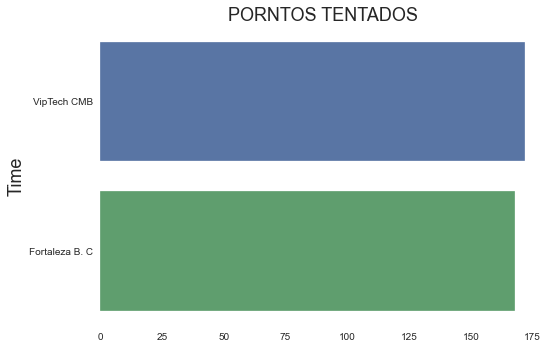

In [159]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times, hue_order=True)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16

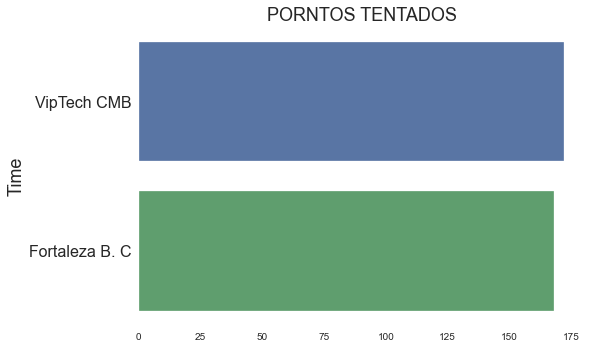

In [160]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_T.png', format='png')

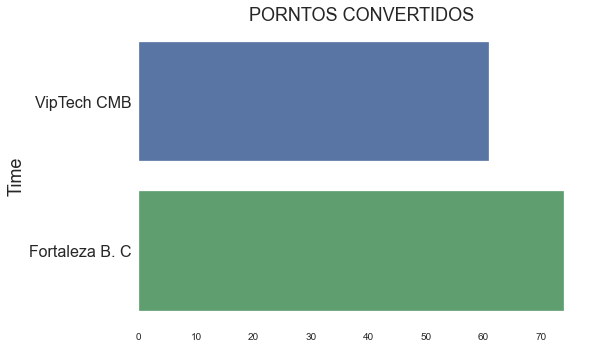

In [161]:
sns.set_style('white')
sns.barplot(x='Pts_C', y='Time', data=tabela_times)
plt.title('PORNTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_C.png', format='png')

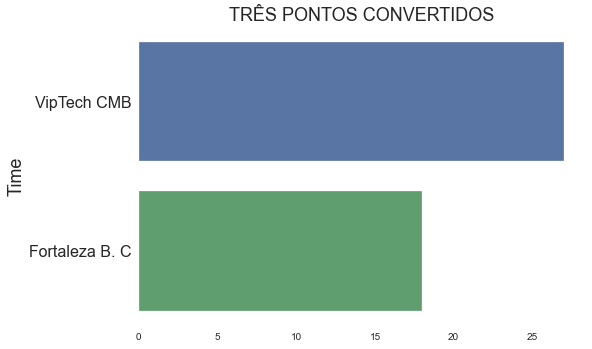

In [162]:
sns.set_style('white')
sns.barplot(x='Pts_3_C', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_3_C.png', format='png')

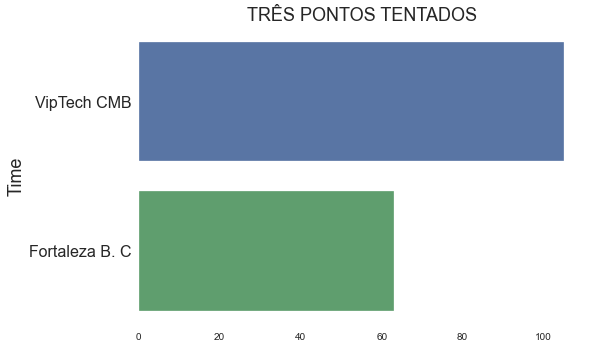

In [163]:
sns.set_style('white')
sns.barplot(x='Pts_3_T', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_3_T.png', format='png')

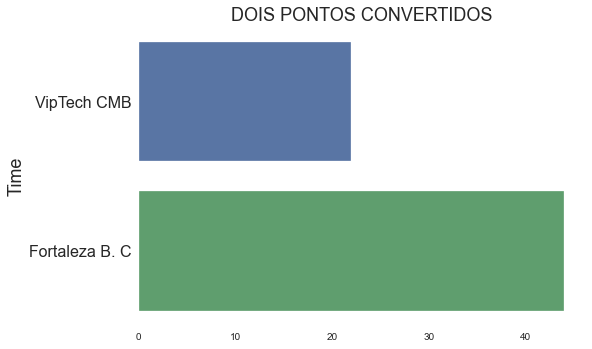

In [164]:
sns.set_style('white')
sns.barplot(x='Pts_2_C', y='Time', data=tabela_times)
plt.title('DOIS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_C.png', format='png')

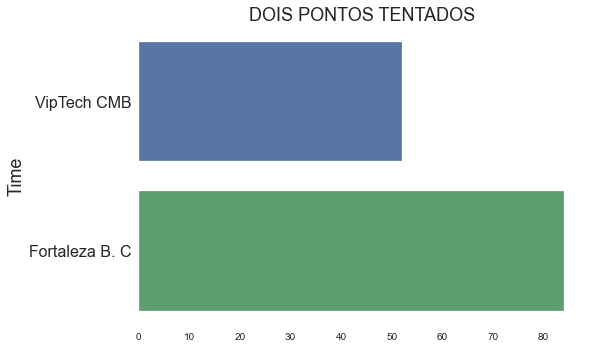

In [165]:
sns.set_style('white')
sns.barplot(x='Pts_2_T', y='Time', data=tabela_times)
plt.title('DOIS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_T.png', format='png')

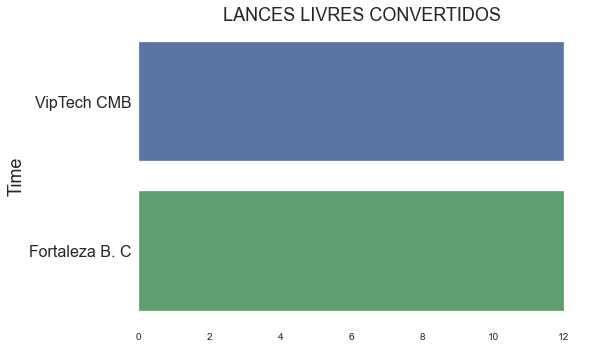

In [166]:
sns.set_style('white')
sns.barplot(x='LL_C', y='Time', data=tabela_times)
plt.title('LANCES LIVRES CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_C.png', format='png')

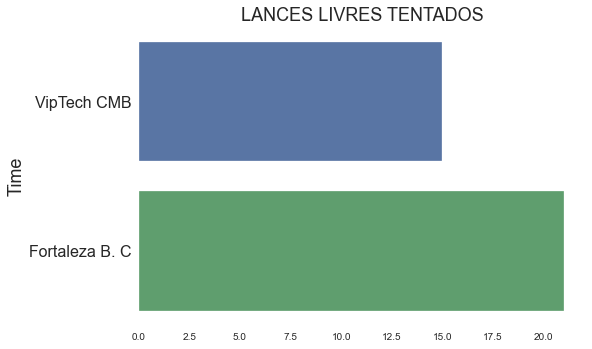

In [167]:
sns.set_style('white')
sns.barplot(x='LL_T', y='Time', data=tabela_times)
plt.title('LANCES LIVRES TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_T.png', format='png')

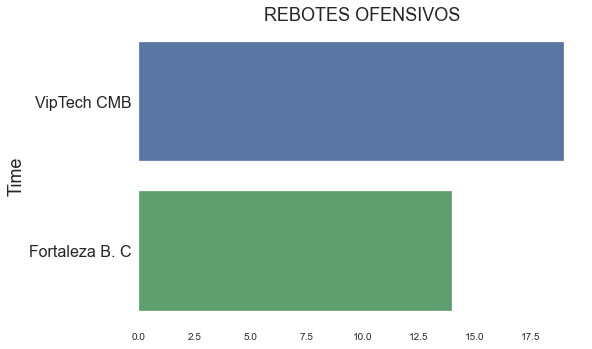

In [168]:
sns.set_style('white')
sns.barplot(x='RO', y='Time', data=tabela_times)
plt.title('REBOTES OFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RO.png', format='png')

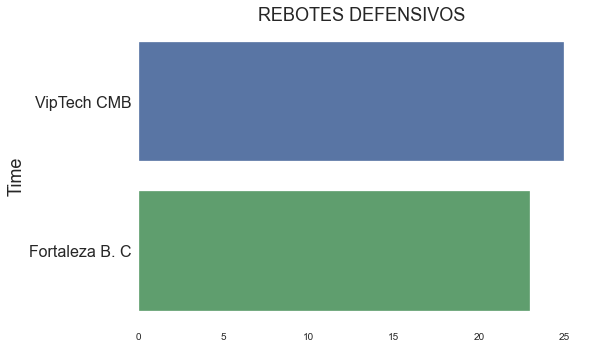

In [169]:
sns.set_style('white')
sns.barplot(x='RD', y='Time', data=tabela_times)
plt.title('REBOTES DEFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RD.png', format='png')

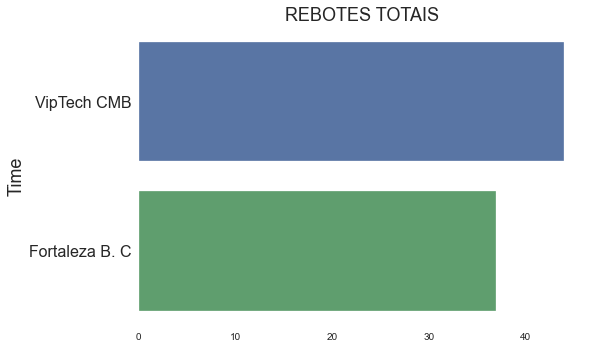

In [170]:
sns.set_style('white')
sns.barplot(x='RT', y='Time', data=tabela_times)
plt.title('REBOTES TOTAIS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RT.png', format='png')

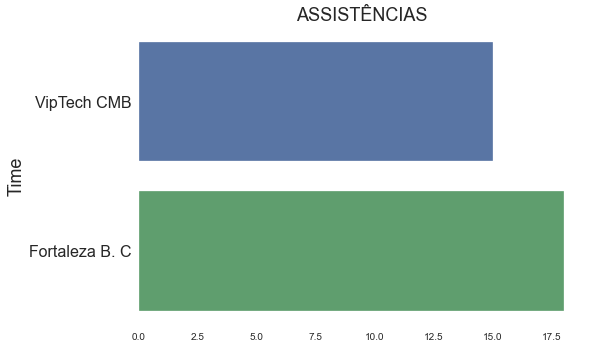

In [171]:
sns.set_style('white')
sns.barplot(x='AS', y='Time', data=tabela_times)
plt.title('ASSISTÊNCIAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/AS.png', format='png')

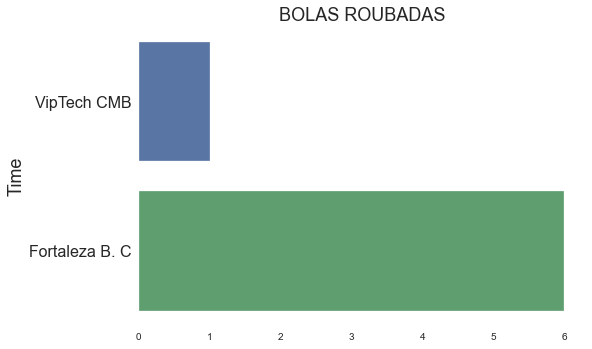

In [172]:
sns.set_style('white')
sns.barplot(x='BR', y='Time', data=tabela_times)
plt.title('BOLAS ROUBADAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/BR.png', format='png')

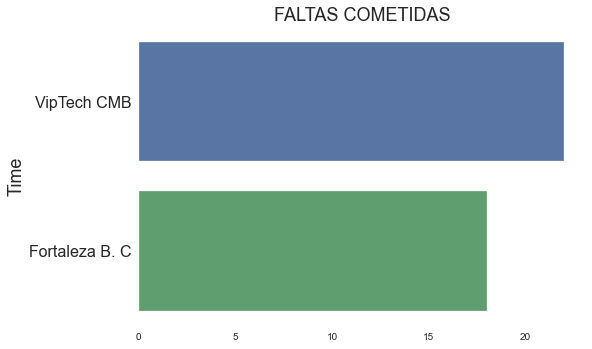

In [173]:
sns.set_style('white')
sns.barplot(x='FC', y='Time', data=tabela_times)
plt.title('FALTAS COMETIDAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/FC.png', format='png')

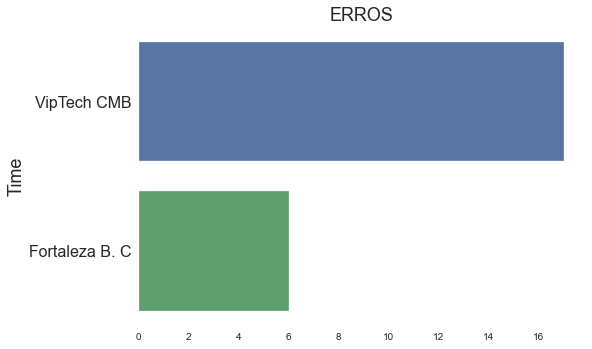

In [174]:
sns.set_style('white')
sns.barplot(x='ER', y='Time', data=tabela_times)
plt.title('ERROS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/ER.png', format='png')

# Gráficos com as análises avançadas 

Para se comparar os indicadores técnicos precisamos olhar não só do jogo mas tb da liga 

In [175]:
para_grafico_time_1 = analise[(analise['Time'] == nome_time_casa) & (analise['Nome'] == 'Equipe')]
para_grafico_time_1.reset_index(drop=True, inplace=True)

In [176]:
para_grafico_time_1.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### precisa acrescentar ao data frame os valore que representam a melhor temporda
### Comparar com a perfeição 

In [177]:
todas_temporadas = pd.DataFrame({'Time':['Melhor'],'EF_Pts':[0.700], 'EF_Pts_3':[0.700], 'EF_LL':[4.000], 'eFG_%':[0.7],
                                 'TOV_%':[25.0], 'FTA/FGA':[0.2], 'Posse_de_Bola':[100.0], 'Offensive_Rating':[200.0],
                                 'TS_%':[1.000], 'Ass/ER':[3.000], 'AS_Ratio':[30.0]})

In [178]:
# para_grafico_temporadas = pd.concat([para_grafico,todas_temporadas], ignore_index=True)

In [179]:
para_grafico_time_1

,Time,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,FR_LL_C,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,VipTech CMB,0.355,1.328,1.831,0.257,0.721,0.605,0.423,0.197,0.087,0.8,0.398,9.4,0.306,161.0,37.9,0.186,0.882,9.3


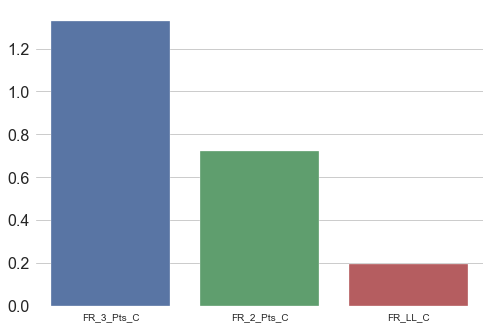

In [180]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

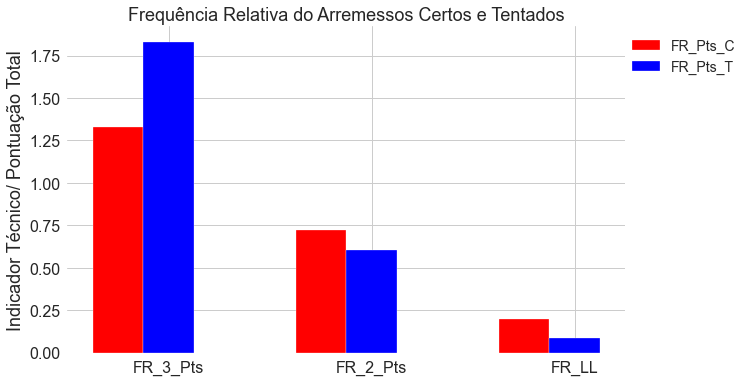

In [181]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

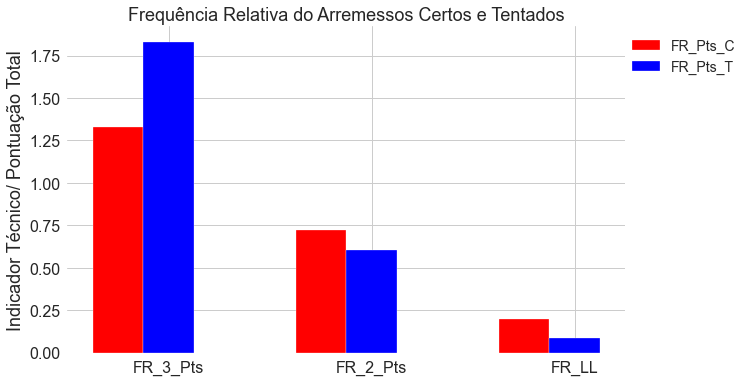

In [182]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

### Time 2

In [183]:
para_grafico_time_2 = analise[(analise['Time'] == nome_time_fora) & (analise['Nome'] == 'Equipe')]
para_grafico_time_2.reset_index(drop=True, inplace=True)

In [184]:
para_grafico_time_2.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


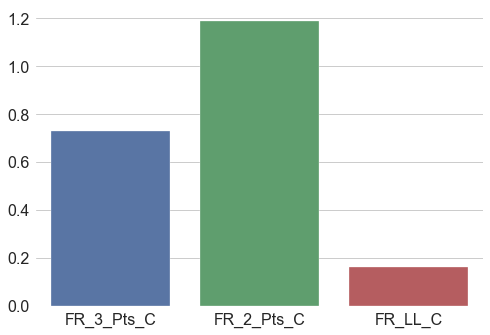

In [185]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

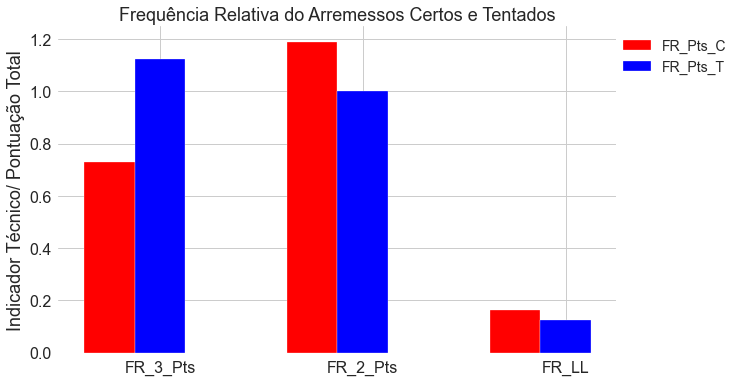

In [186]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_2['FR_3_Pts_T'][0], para_grafico_time_2['FR_2_Pts_T'][0], para_grafico_time_2['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

In [187]:
ponto_quarto = df[(df['Indicador'] == 'fim_quarto')][::-1]
ponto_quarto.reset_index(drop=True, inplace=True)
ponto_quarto

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,600,14,15,NaN,fim_quarto,NaN,-1,1
1,2,1200,19,28,NaN,fim_quarto,NaN,-9,9
2,3,1800,46,49,NaN,fim_quarto,NaN,-3,3
3,4,2400,61,74,NaN,fim_quarto,NaN,-13,13


In [188]:
inf_placar_casa = ponto_quarto['placar_casa'].diff()
inf_placar_casa[0] = ponto_quarto['placar_casa'][0]
inf_placar_casa = inf_placar_casa.astype(int)
inf_placar_casa = inf_placar_casa.tolist()
inf_placar_casa

[14, 5, 27, 15]

In [189]:
inf_placar_fora = ponto_quarto['placar_visitante'].diff()
inf_placar_fora[0] = ponto_quarto['placar_visitante'][0]
inf_placar_fora = inf_placar_fora.astype(int)
inf_placar_fora = inf_placar_fora.tolist()
inf_placar_fora

[15, 13, 21, 25]

In [190]:
placar_casa = sum(inf_placar_casa)

In [191]:
placar_fora = sum(inf_placar_fora)

In [192]:
# aaaa

In [193]:
pdf = FPDF('P', 'mm', 'A4')
# Capa do relatório
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# capa
criar_titulo(pdf, data_hoje)
fotos_dos_times(pdf, img_casa, nome_time_casa, img_fora, nome_time_fora)
informacoes_do_placar(pdf, classificatoria, placar_casa, placar_fora, dia_do_jogo)
grafico_quartos_normal(pdf, nome_time_casa, nome_time_fora)
placar_do_quarto1(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto2(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto3(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto4(pdf, inf_placar_casa, inf_placar_fora)
placar_final(pdf, placar_casa, placar_fora)
informacoes_do_relatorio(pdf)


# Primeira página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Títulos das Análises
comentarios_p1(pdf)
# Gráficos das Análises linha 1
graficos_analise_descrivita_l1(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 2
graficos_analise_descrivita_l2(pdf, tabela_times, arquivo)
comentarios_p1_1(pdf)
# Gráficos das Análises linha 3
graficos_analise_descrivita_l3(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 4
graficos_analise_descrivita_l4(pdf, tabela_times, arquivo)
comentarios_p1_2(pdf)

# Segunda Página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Comentarios das Análises Avançadas
comentarios_p2(pdf)
# Gráficos das Análises
graficos_analise_avancadas_c1(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c2(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c3(pdf, tabela_times, arquivo)
# considerações finais 
comentarios_p2_1(pdf)


# Terceira Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_casa)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo1, pontos_c_1)
cinco_melhores_pontuadores(pdf, pontos_c_1)

# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo1, tres_pontos_c_1)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_1)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo1, dois_pontos_c_1)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_1)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo1, as_1)
cinco_melhores_assistencias(pdf, as_1)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo1, rt_1)
cinco_melhores_reboteiros(pdf, rt_1)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo1, fr_1)
cinco_melhores_faltas_recebidas(pdf, fr_1)
# tabela geral
tabela_geral_casa(pdf, arquivo)

# Quarta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Casa
comentarios_p4(pdf, nome_time_casa)
# Gráfico dos Períodos Positos do Time da Casa
grafico_periodos_positivos_casa(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Casa 
grafico_tempo_posse_de_bola_casa(pdf, arquivo)
# Comentários
comentarios_p4_1(pdf)

# Quinta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p5(pdf, nome_time_casa)
primeiro_quinteto_fotos_casa(pdf)
segundo_quinteto_fotos_casa(pdf)
terceiro_quinteto_fotos_casa(pdf)
# Título das Melhores substituições
comentarios_p5_1(pdf)
# Jogadores e Comentários
substituicao_1_casa(pdf)
substituicao_2_casa(pdf)

# Sexta Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_fora)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo2, pontos_c_2)
cinco_melhores_pontuadores(pdf, pontos_c_2)
# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo2, tres_pontos_c_2)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_2)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo2, dois_pontos_c_2)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_2)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo2, as_2)
cinco_melhores_assistencias(pdf, as_2)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo2, rt_2)
cinco_melhores_reboteiros(pdf, rt_2)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo2, fr_2)
cinco_melhores_faltas_recebidas(pdf, fr_2)
# tabela geral
tabela_geral_fora(pdf, arquivo)

# Setima Página Períodos Positivos do Time da Fora
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Fora
comentarios_p7(pdf, nome_time_fora)
# Gráfico dos Períodos Positos do Time da Fora
grafico_periodos_positivos_fora(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Fora 
grafico_tempo_posse_de_bola_fora(pdf, arquivo)
# Comentários
comentarios_p7_1(pdf)

# Oitava Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p8(pdf, nome_time_fora)
primeiro_quinteto_fotos_fora(pdf)
segundo_quinteto_fotos_fora(pdf)
terceiro_quinteto_fotos_fora(pdf)
# Título das Melhores substituições
comentarios_p8_1(pdf)
# Jogadores e Comentários
substituicao_1_fora(pdf)
substituicao_2_fora(pdf)

pdf.output('teste.pdf', 'F')

''

In [194]:
aaaaaaa

NameError: name 'aaaaaaa' is not defined

In [ ]:
# posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)

In [ ]:
filtro = (posse_bola['diferenca'] >= 1) | (posse_bola['Indicador'] == 'inicio_partida') | (posse_bola['Indicador'] == 'fim_quarto')
valor_posse_bola = posse_bola[filtro]

In [ ]:
valor_posse_bola

In [ ]:
valor_posse_bola.to_csv('valor_posse_bola.csv')

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(valor_posse_bola['Tempo'], valor_posse_bola['diferenca'])

In [ ]:
Flamengo = df.query("Time == 'FLA'")

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_casa")

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_visitante")

In [ ]:
Flamengo = df.query("Time == 'FLA'").sort_values(by=['Tempo'])

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo.set_index("Tempo", inplace=True)

In [ ]:
placar_flamengo_valor = placar_flamengo['placar_casa']

In [ ]:
placar_flamengo_valor

In [ ]:
plt.figure(figsize=(15,5))
flamengo_media_movel = placar_flamengo_valor.plot()

In [ ]:
flamengo_media_movel = placar_flamengo_valor.rolling(window=10).mean()

In [ ]:
flamengo_media_movel

In [ ]:
flamengo_dev_pad = placar_flamengo_valor.rolling(window=10).std()

In [ ]:
flamengo_dev_pad

In [ ]:
under_line = (flamengo_media_movel-flamengo_dev_pad)
over_line = (flamengo_media_movel+flamengo_dev_pad)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2)
plt.fill_between(flamengo_dev_pad, under_line, over_line, color='b', alpha=.1) #std curves.

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2) #mean curve.
plt.fill_between(flamengo_dev_pad.index, under_line, over_line, color='b', alpha=.1) #std curves.

# identificação dos quintetos em quadra 

In [ ]:
# faz um if com o seguinte critério 
# if aparecer substituição_entra:
#     a função adiciona o jogador x
# elif aparecer substituição_sai:
#     a função substitui o valor por 0